In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import data_pipeline2 as dp 


import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
#os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.decomposition import PCA


In [3]:
df_train_st, df_test_st = dp.get_cmapss_data(0,80, scaling = 'standard')

df_train_mm, df_test_mm = dp.get_cmapss_data(0,80, scaling = (-1,1))



C:\Users\lefti\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [4]:
X_standard = df_train_st[df_train_st.columns].to_numpy().T

In [5]:
X_minmax = df_train_mm[df_train_mm.columns].to_numpy().T

(array([1, 2], dtype=int64), array([11,  8], dtype=int64))


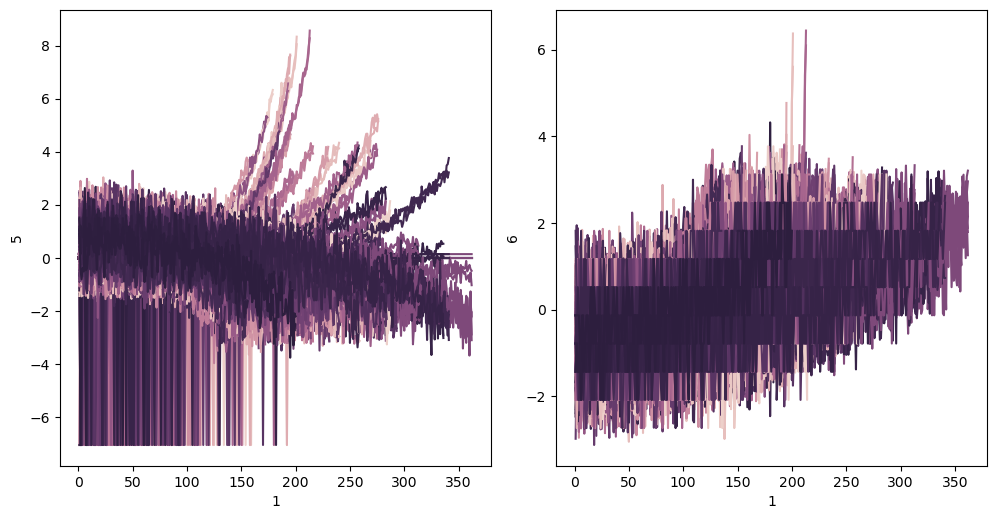

(array([1, 2, 3], dtype=int64), array([7, 8, 4], dtype=int64))


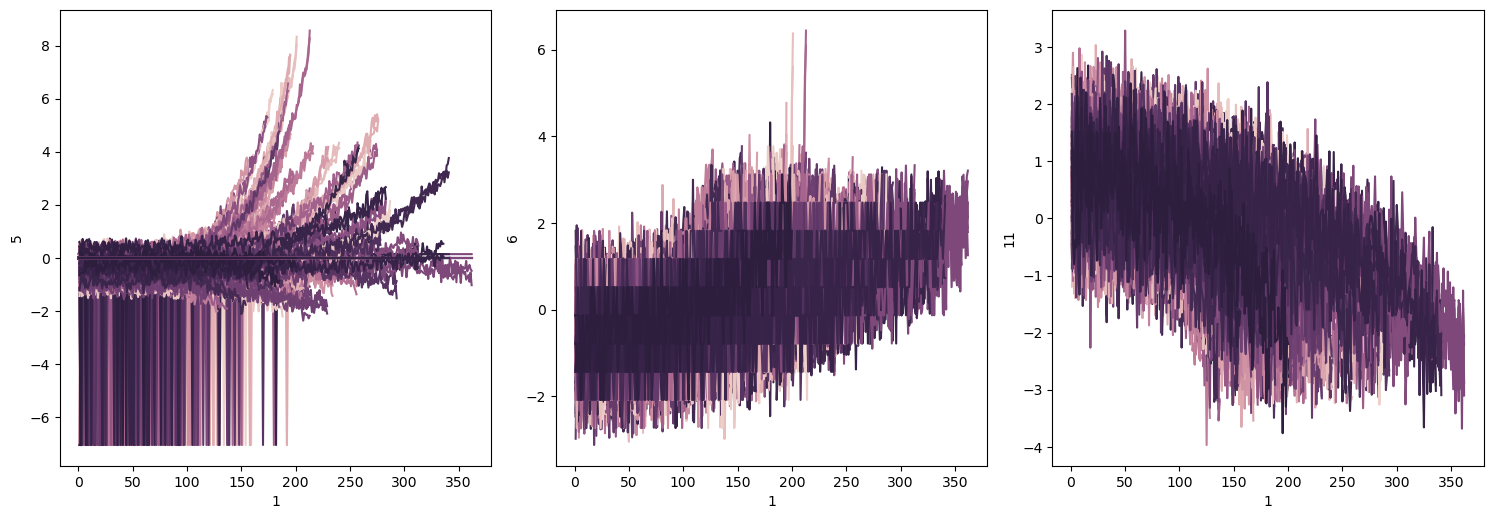

(array([1, 2, 3, 4], dtype=int64), array([5, 8, 4, 2], dtype=int64))


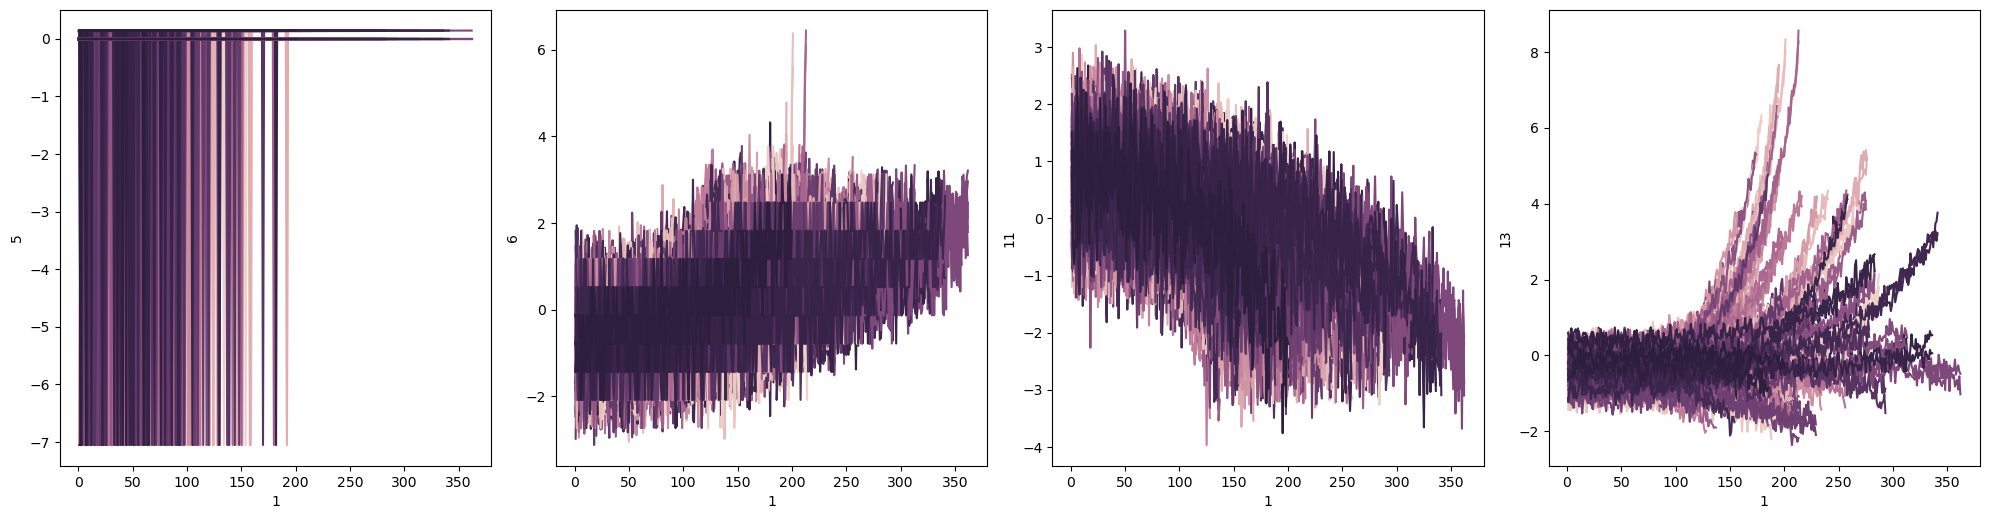

(array([1, 2, 3, 4, 5], dtype=int64), array([8, 2, 4, 4, 1], dtype=int64))


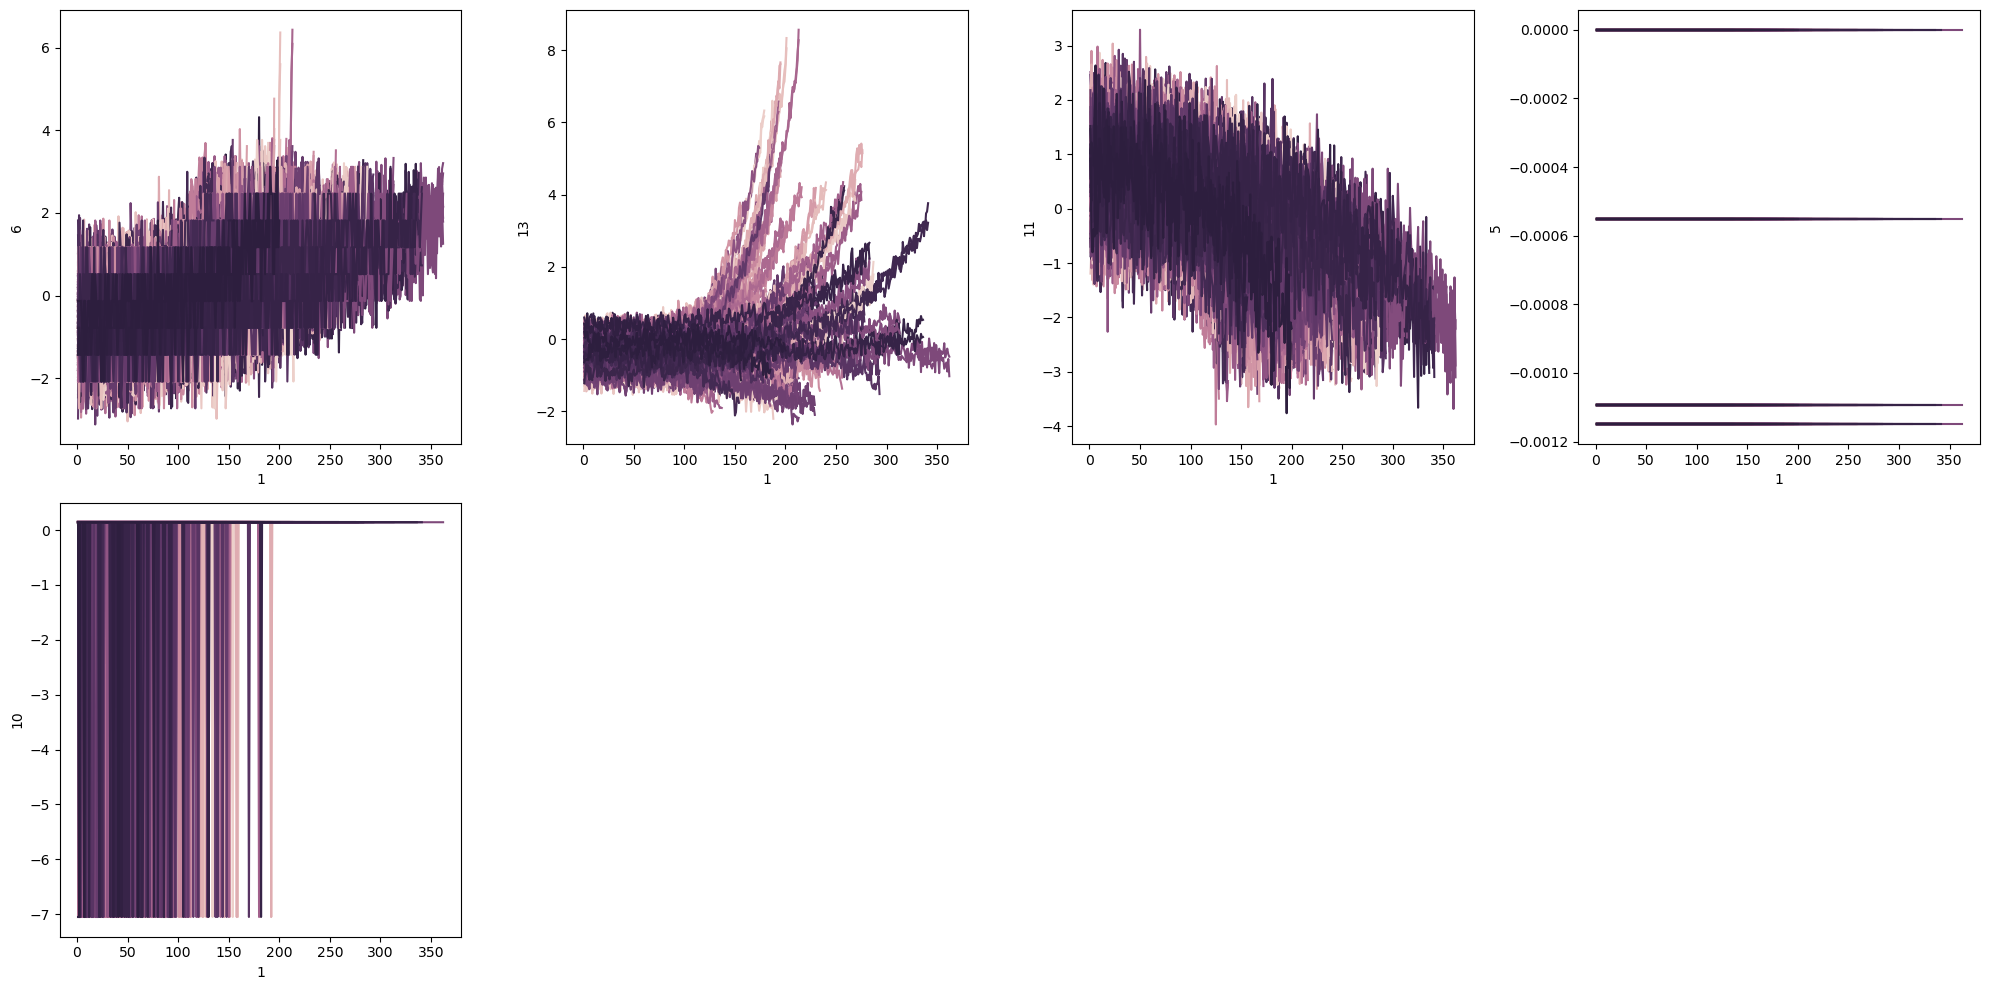

(array([1, 2, 3, 4, 5, 6], dtype=int64), array([7, 2, 4, 4, 1, 1], dtype=int64))


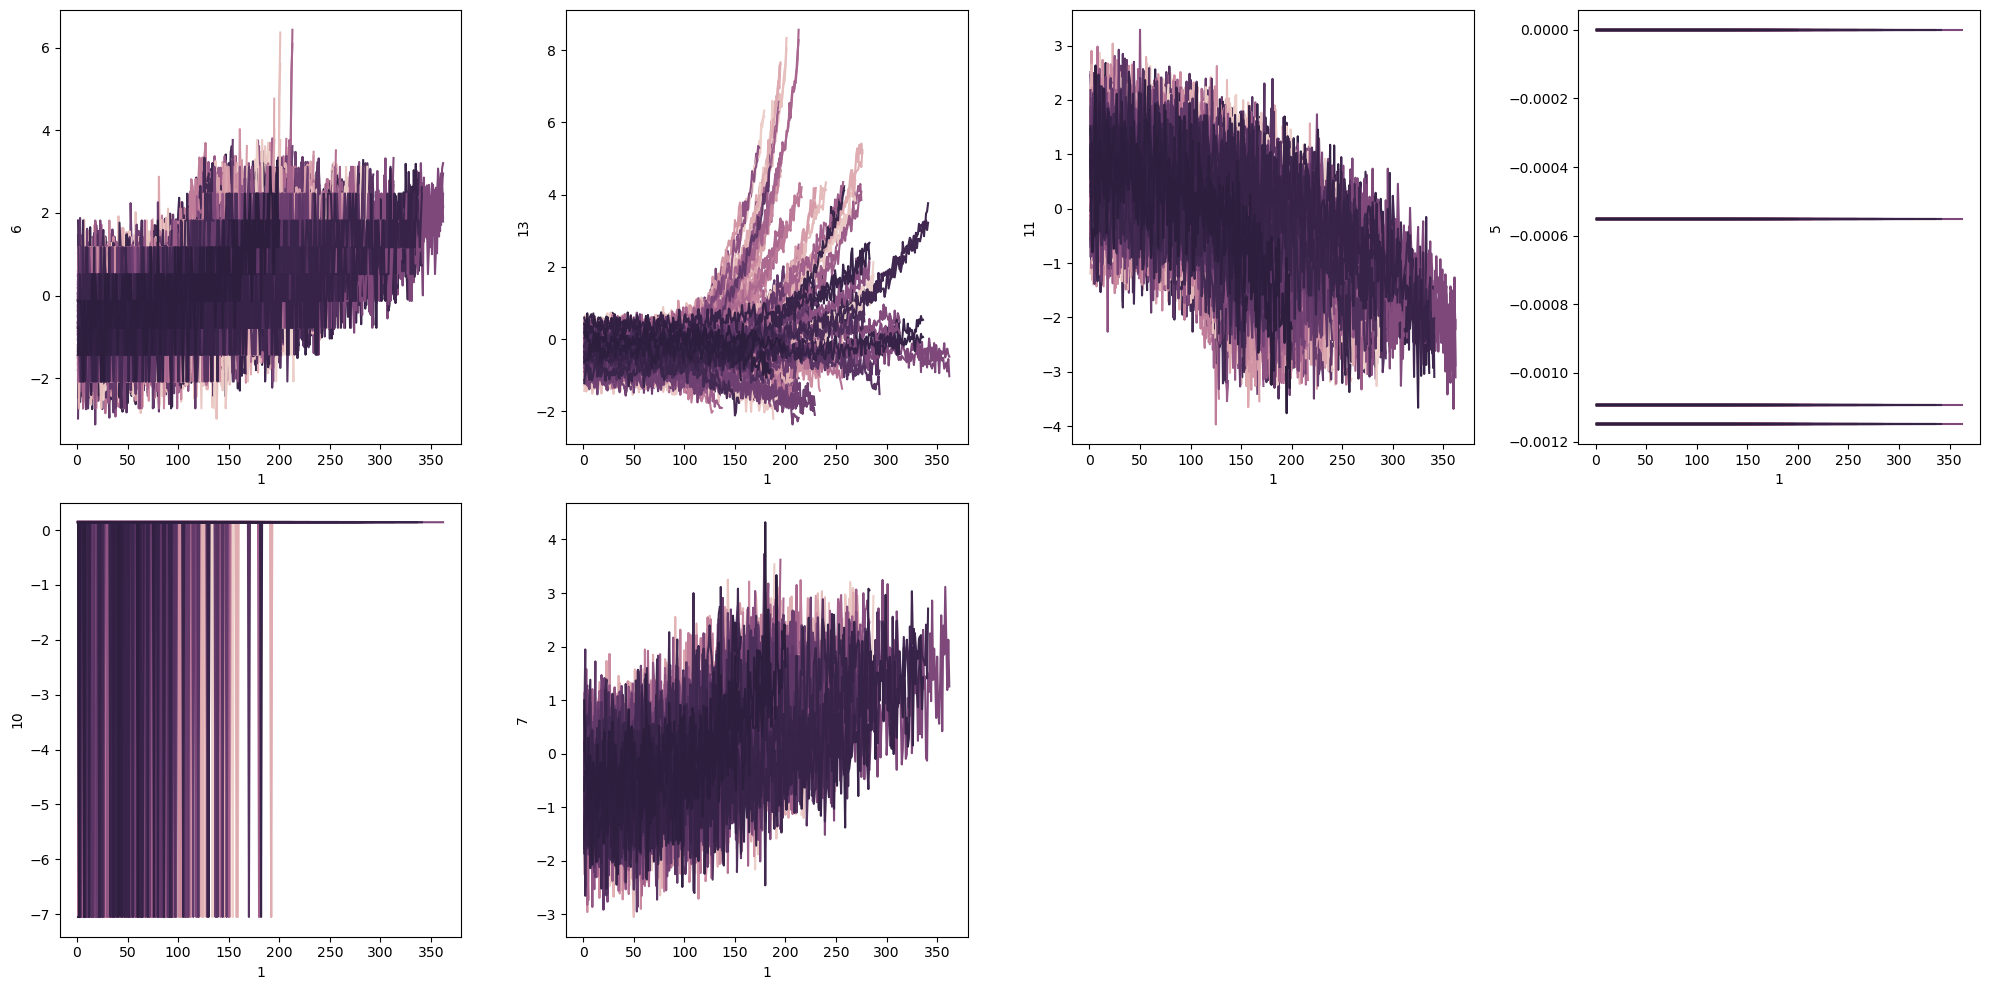

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([6, 2, 4, 4, 1, 1, 1], dtype=int64))


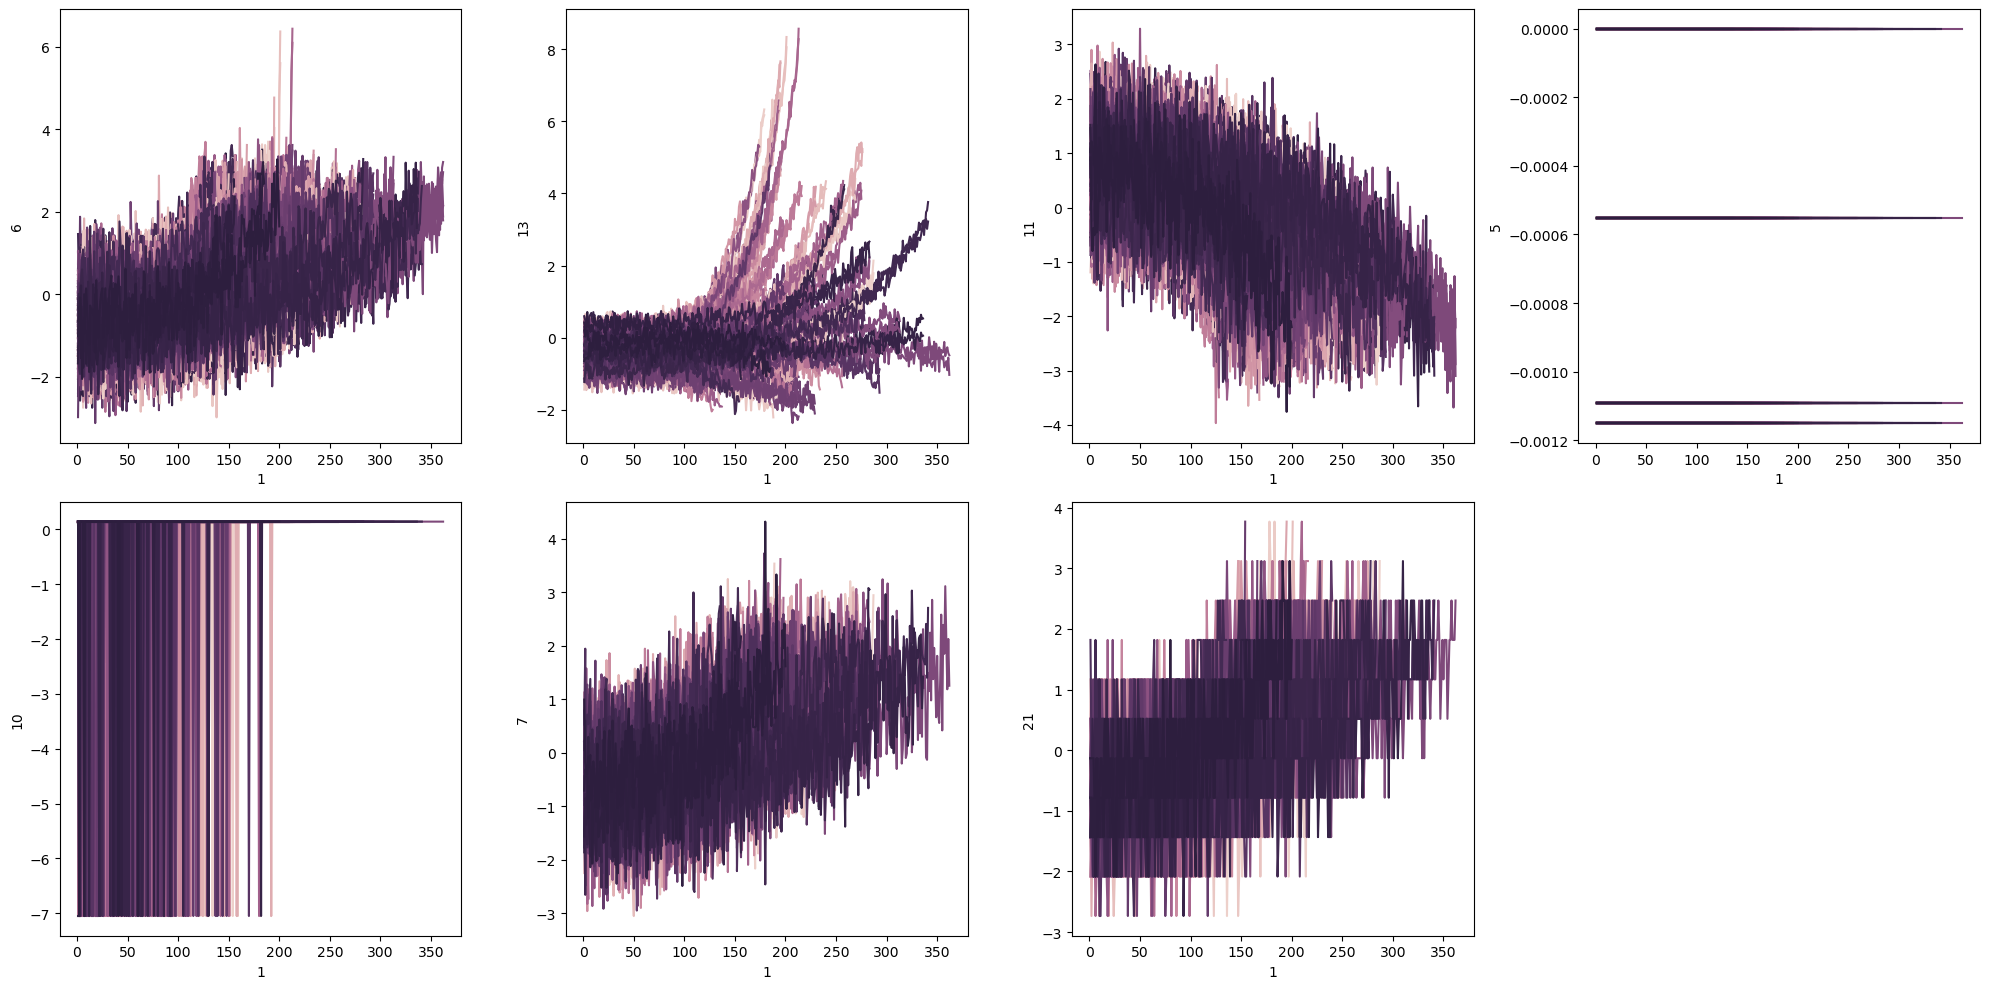

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([4, 2, 4, 2, 1, 1, 1, 4], dtype=int64))


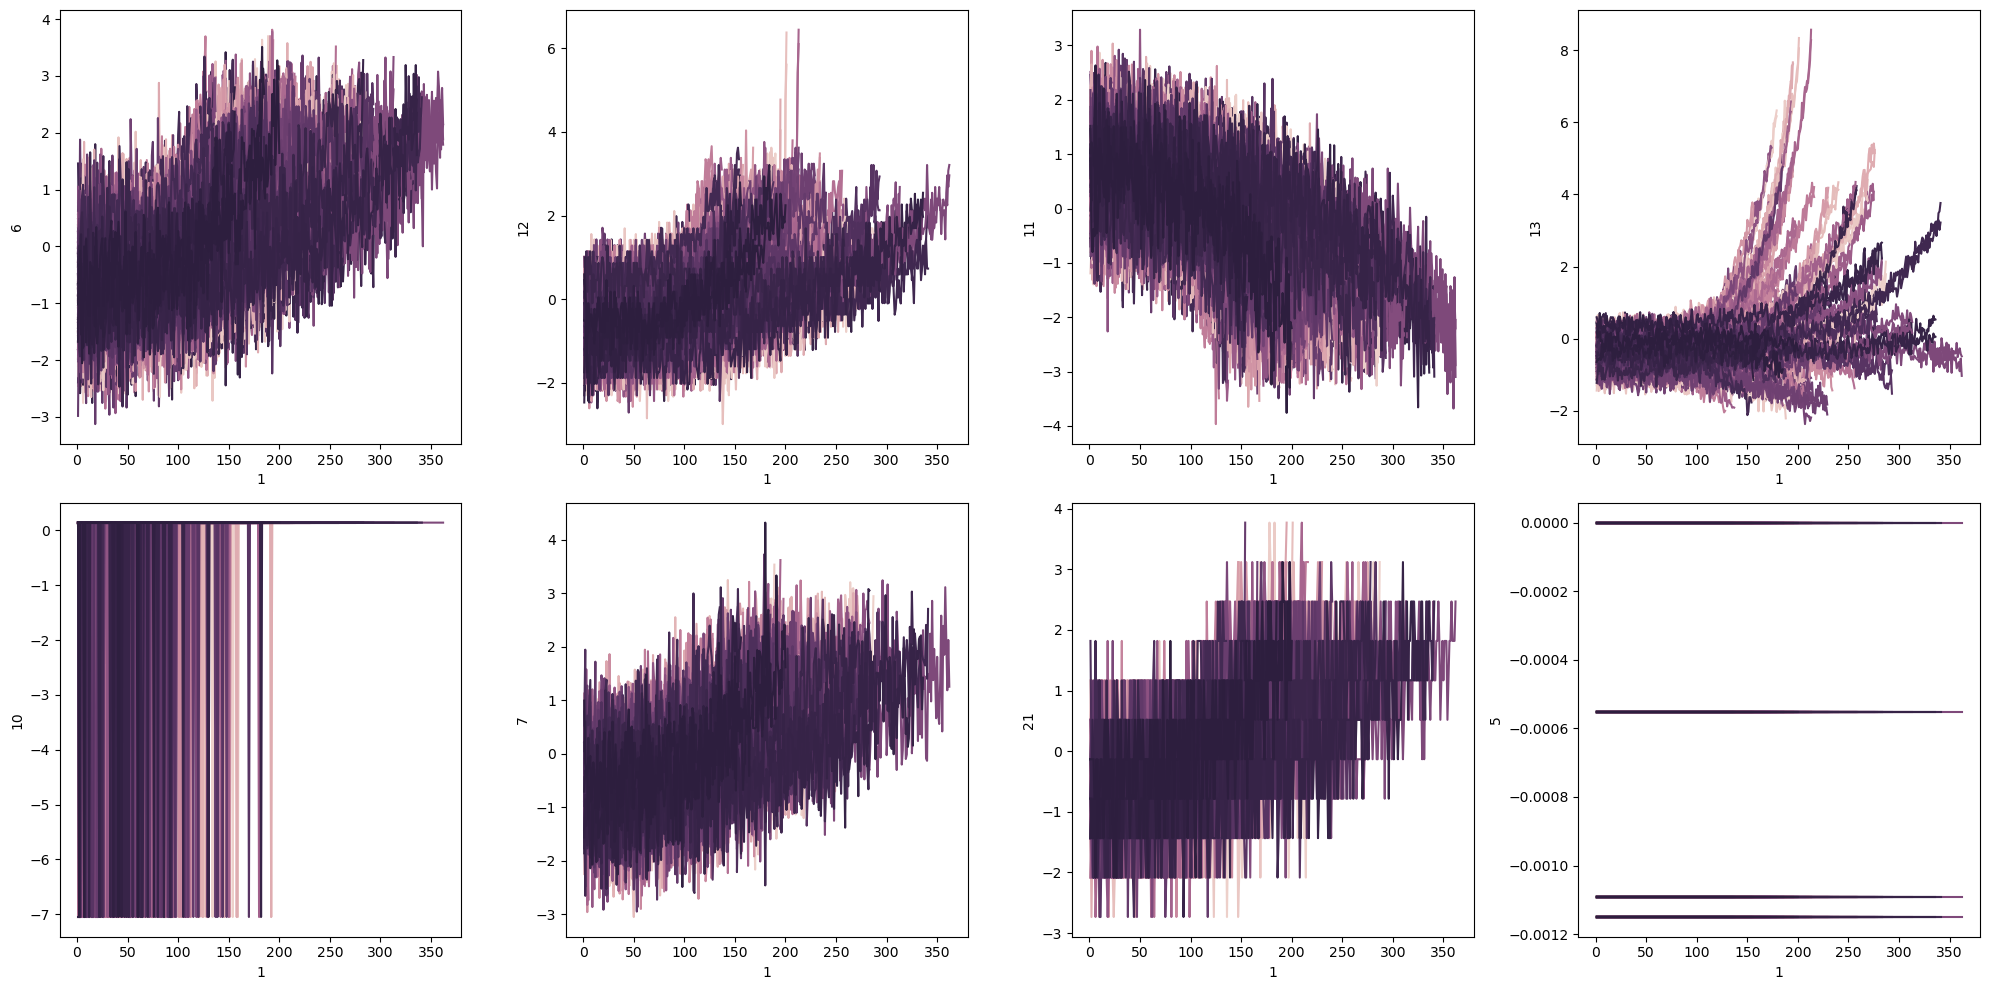

In [6]:
cluster_amts = [2,3,4,5,6,7,8]

for n_clusters in cluster_amts:
    
    
    kmeans = AgglomerativeClustering(n_clusters=n_clusters)


    kmeans = kmeans.fit(X_standard[5:])

    
    plt.figure(figsize = (20,10))

    labs = kmeans.labels_ + 1
    
    print(np.unique(labs, return_counts = True))


    i=0
    for column in df_train_st.columns[5:]:
        plt.subplot(2,4,labs[i])
        sns.lineplot(df_train_st, x = 1, y = column, hue = 0, legend = False)

        i+=1
    plt.tight_layout()
    plt.show()

(array([1, 2], dtype=int64), array([15,  6], dtype=int64))


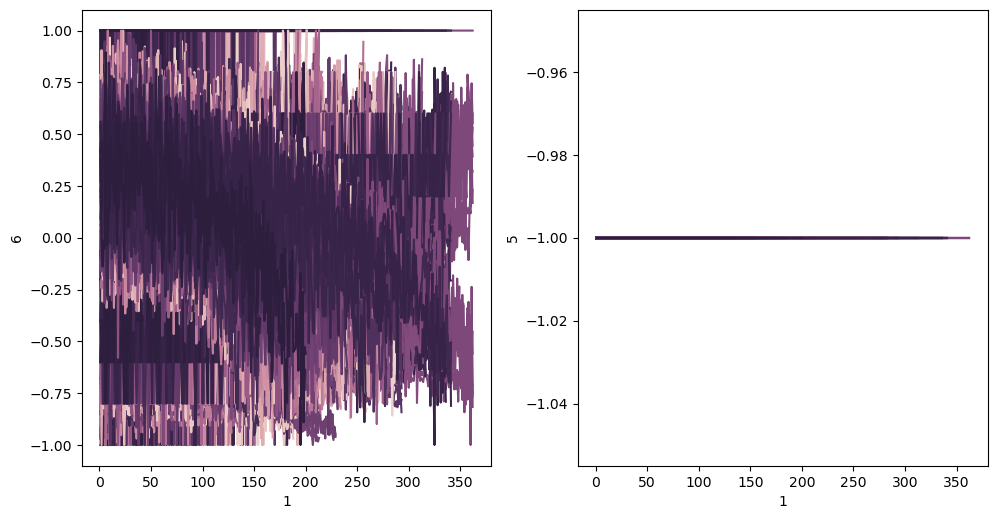

(array([1, 2, 3], dtype=int64), array([ 5,  6, 10], dtype=int64))


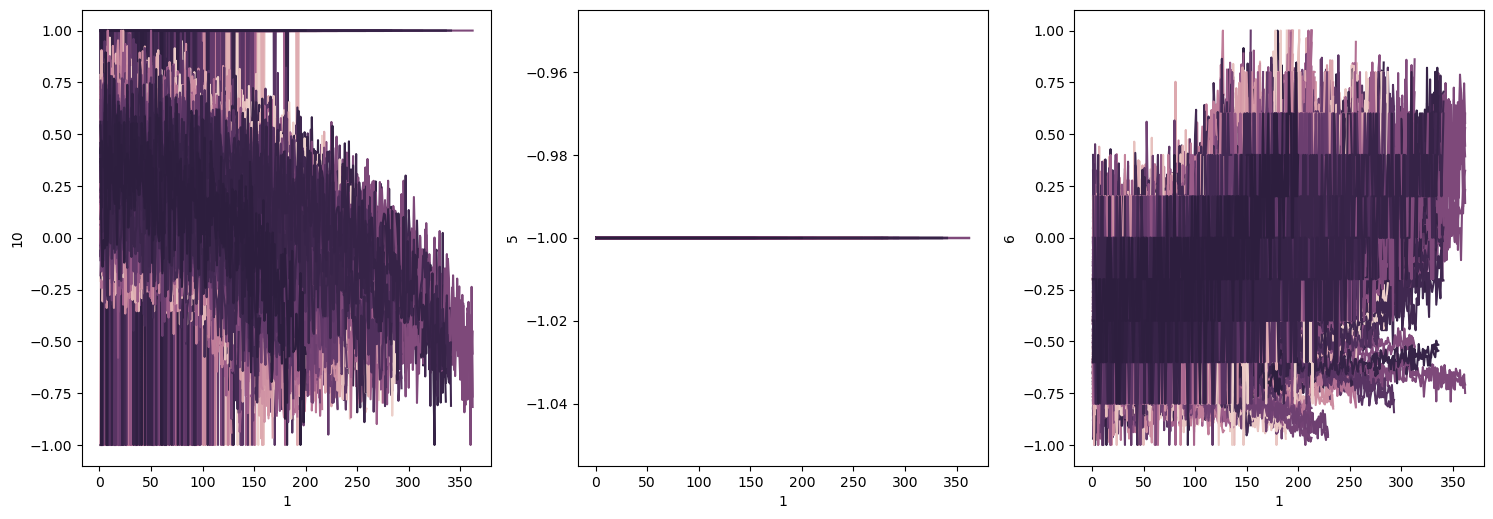

(array([1, 2, 3, 4], dtype=int64), array([10,  6,  4,  1], dtype=int64))


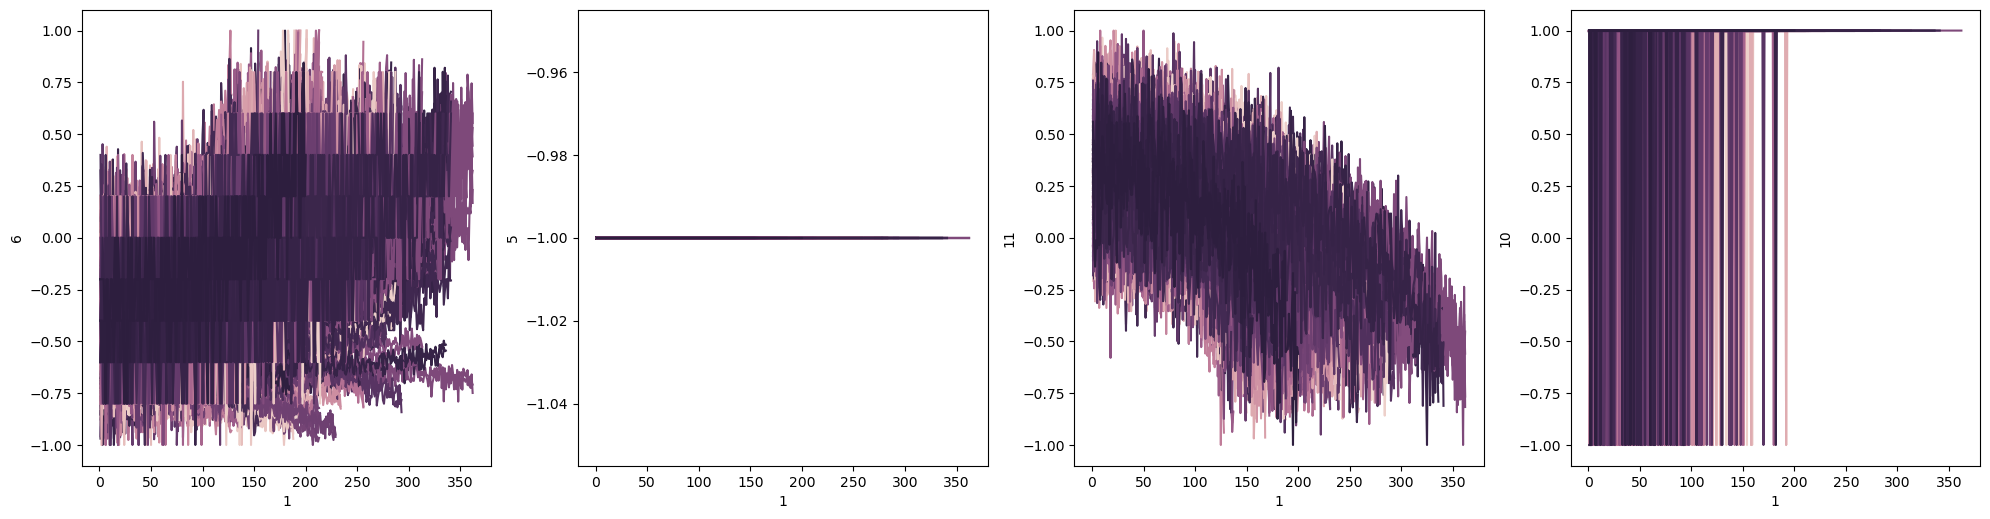

(array([1, 2, 3, 4, 5], dtype=int64), array([4, 6, 4, 1, 6], dtype=int64))


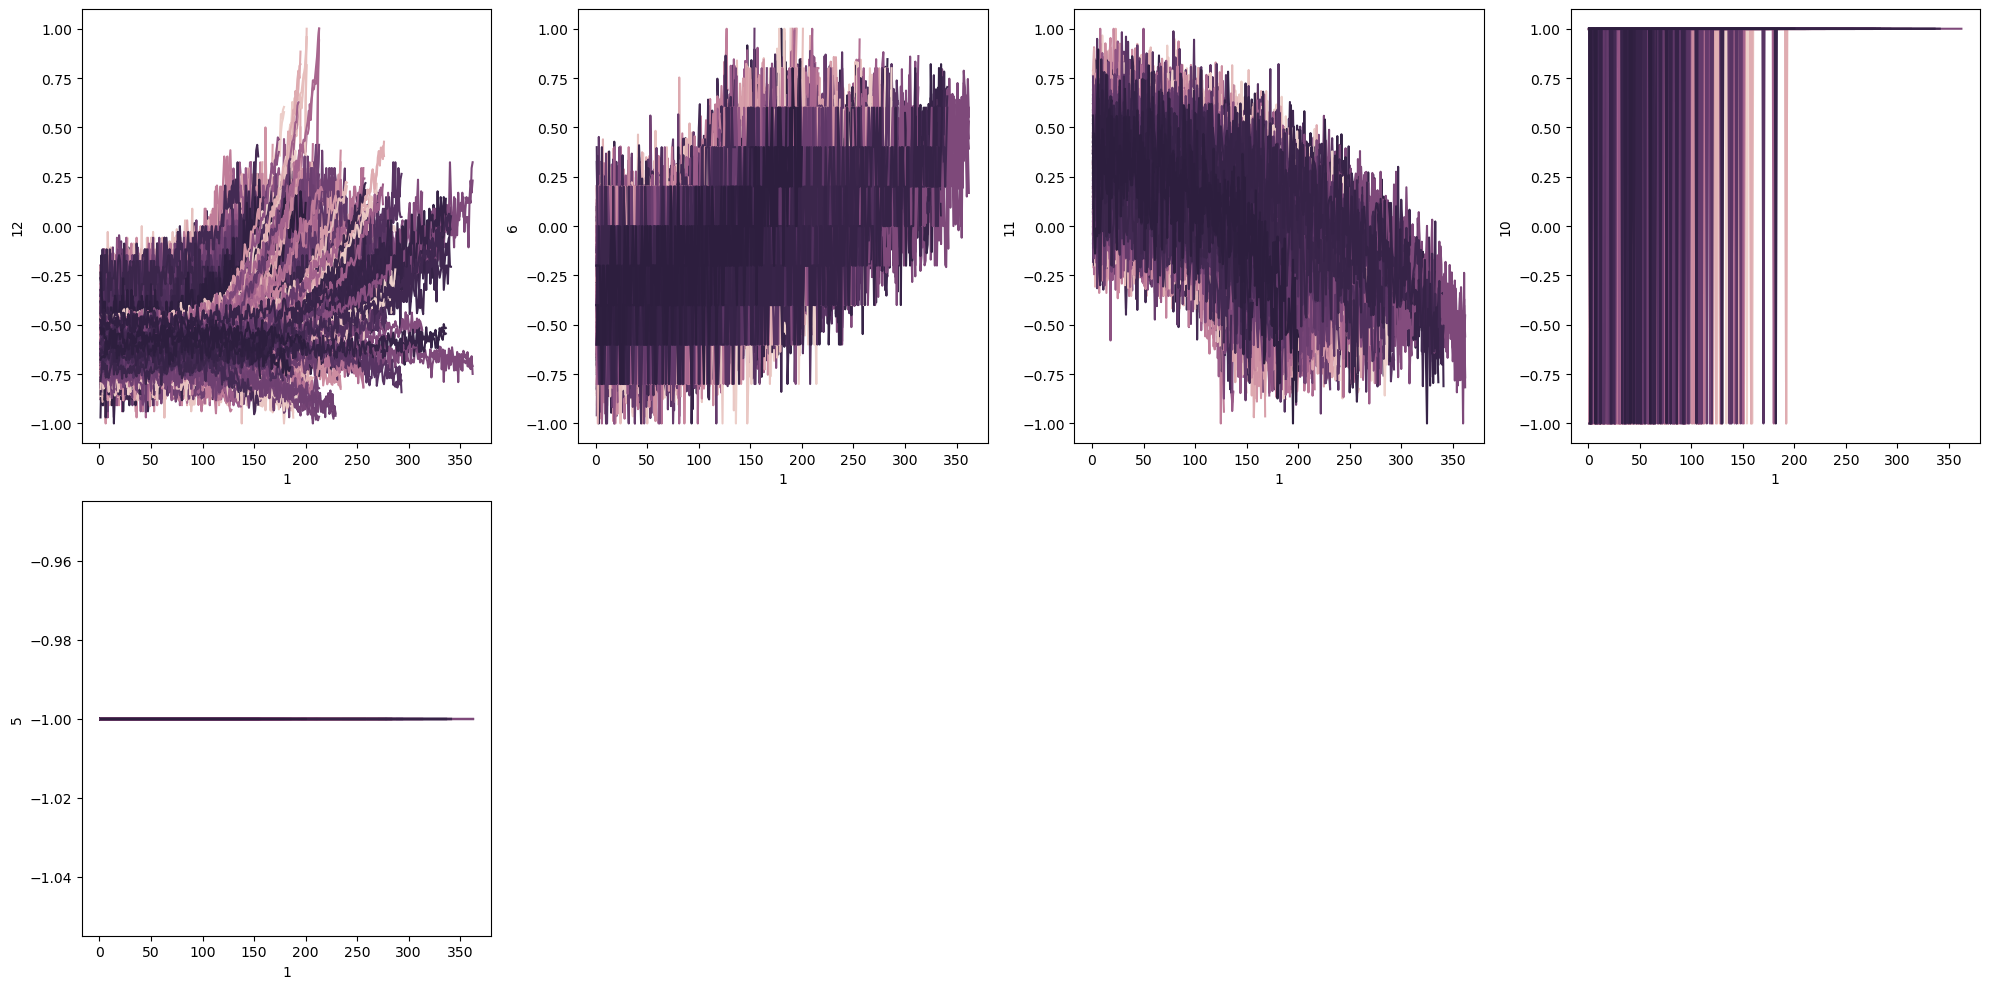

(array([1, 2, 3, 4, 5, 6], dtype=int64), array([6, 2, 4, 1, 6, 2], dtype=int64))


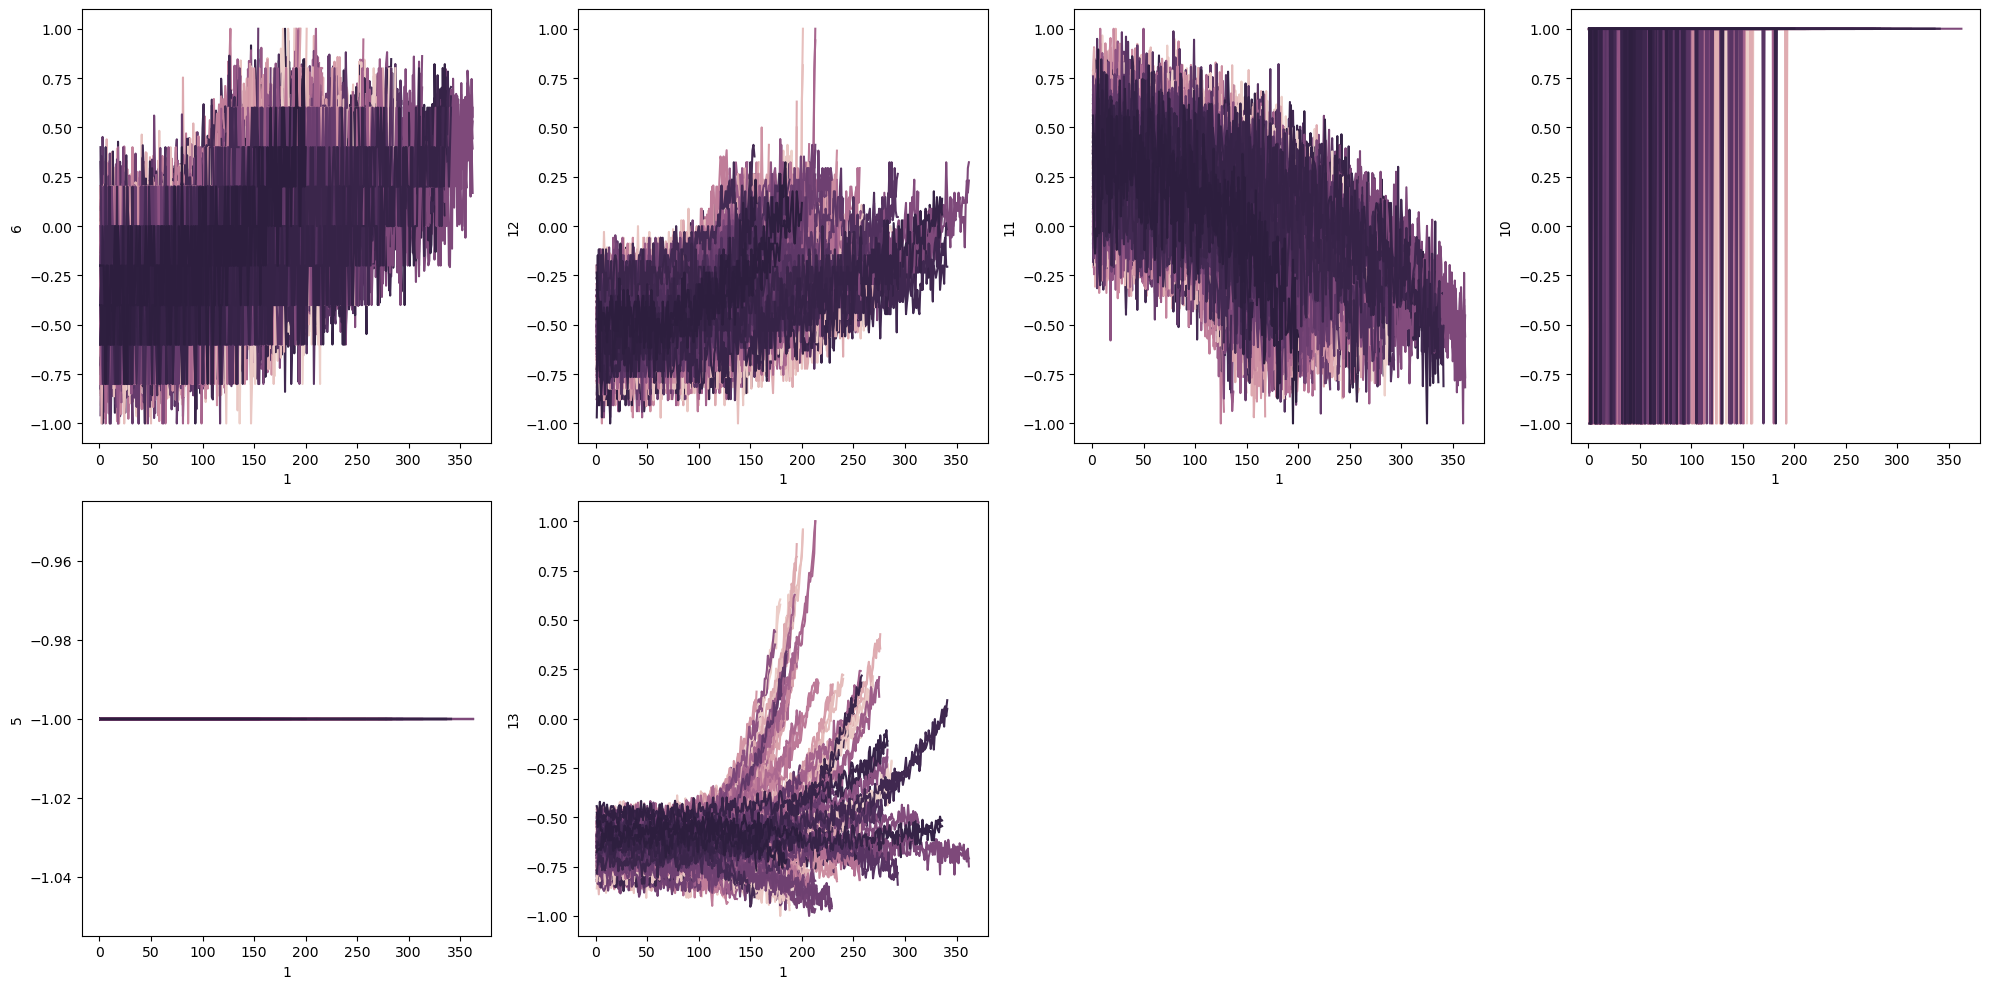

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64), array([2, 2, 4, 1, 6, 2, 4], dtype=int64))


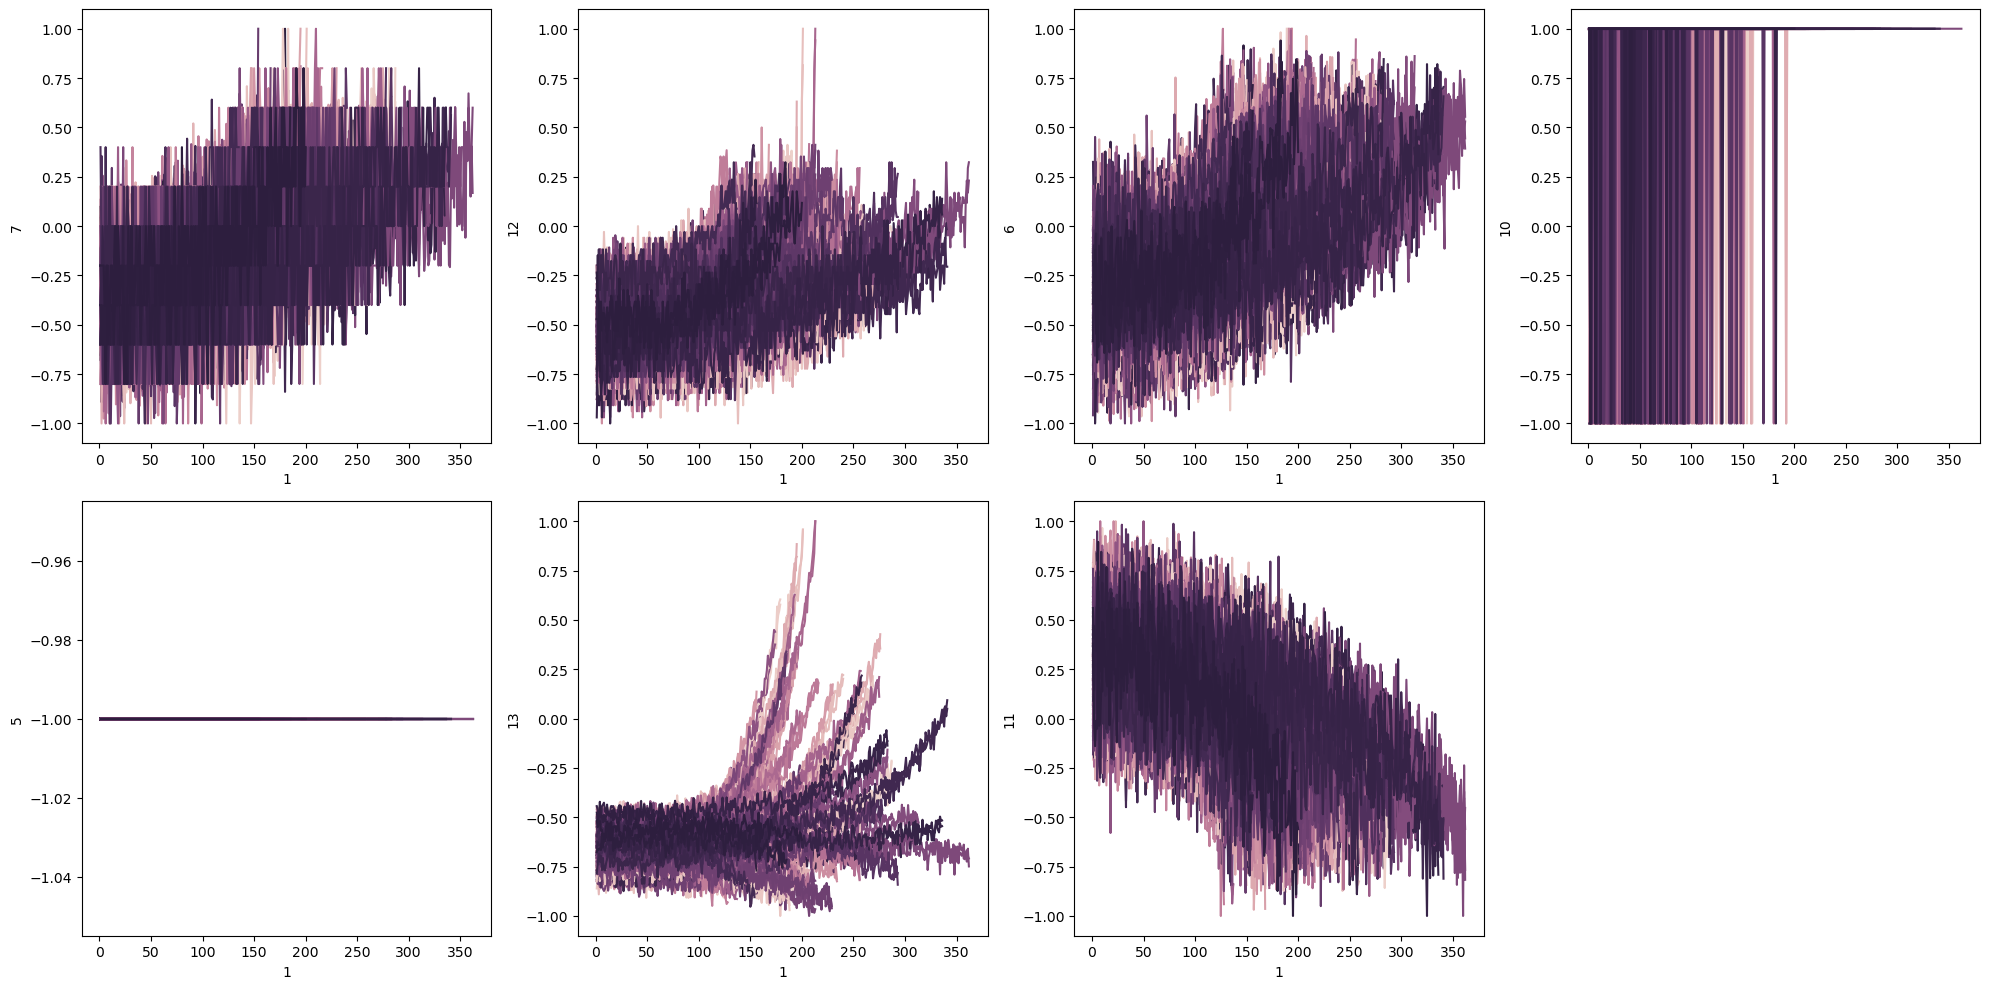

(array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([4, 2, 4, 1, 6, 2, 1, 1], dtype=int64))


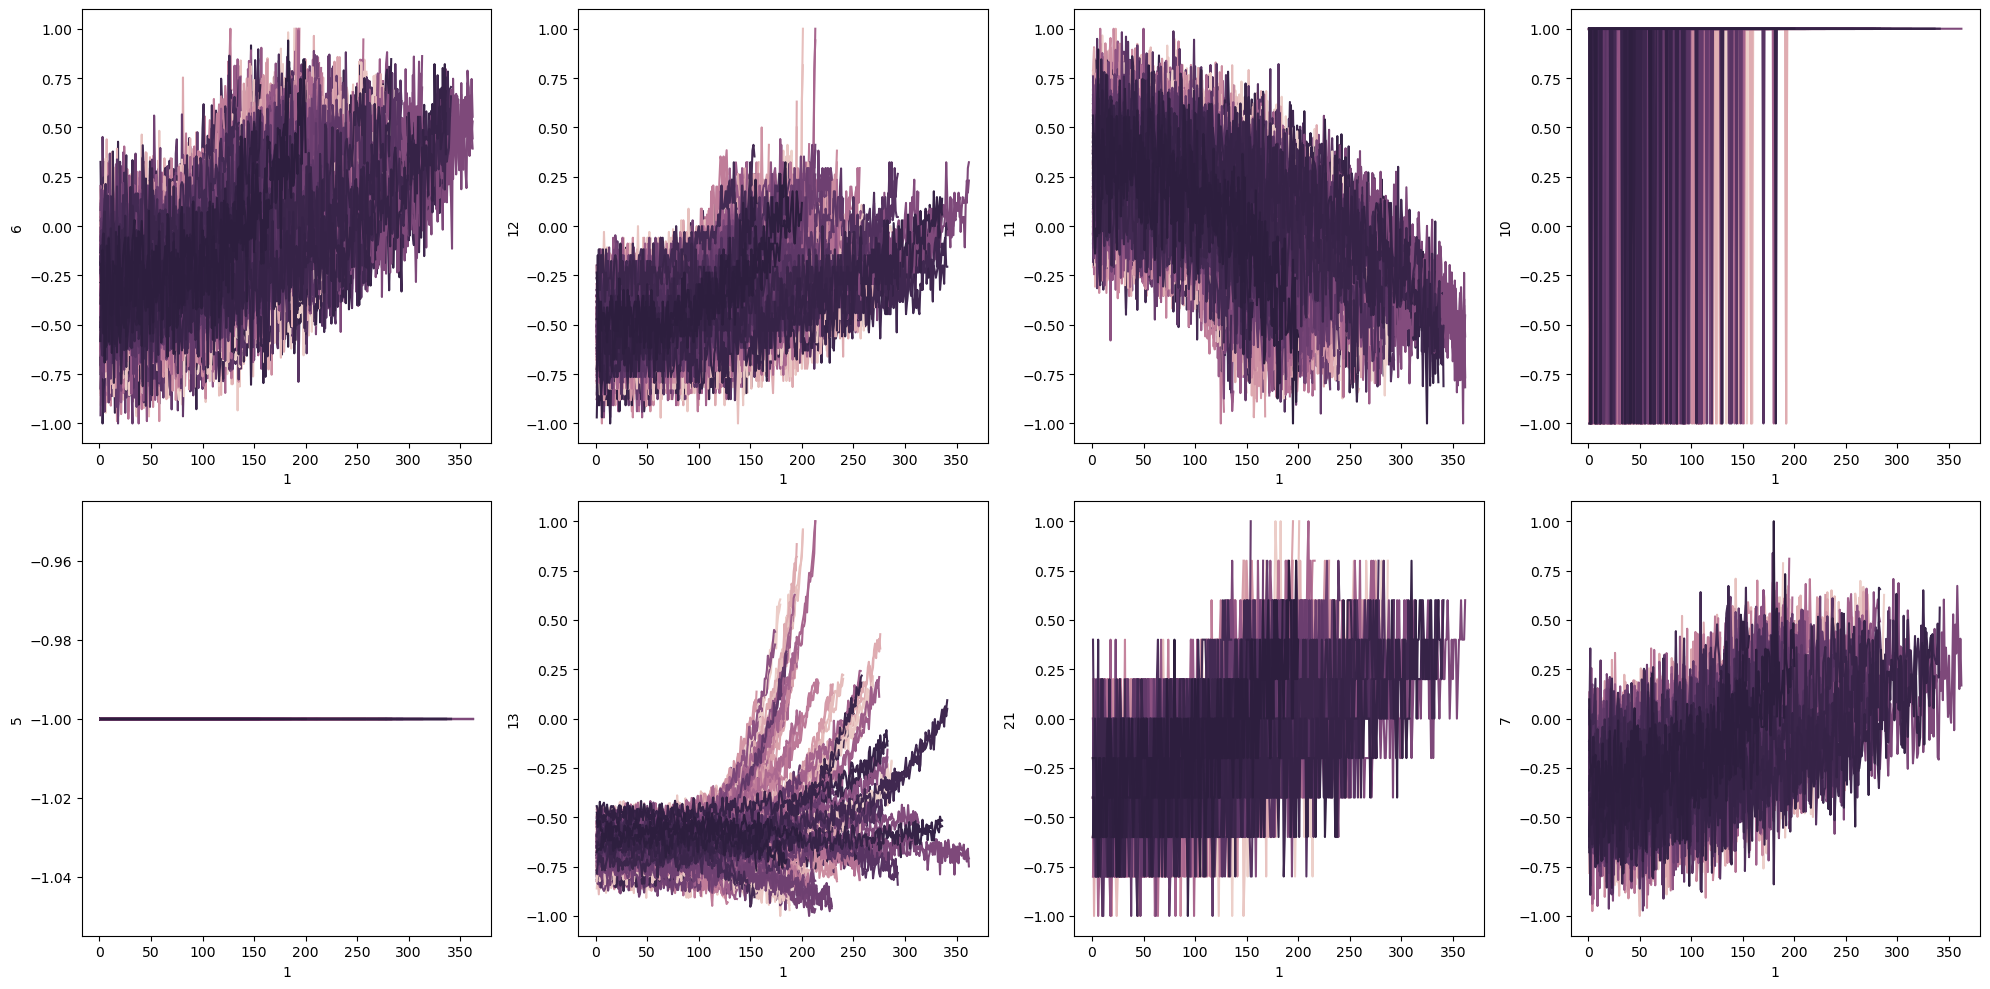

In [7]:
cluster_amts = [2,3,4,5,6,7,8]

for n_clusters in cluster_amts:
    
    
    kmeans = AgglomerativeClustering(n_clusters=n_clusters)


    kmeans = kmeans.fit(X_minmax[5:])

    
    plt.figure(figsize = (20,10))

    labs = kmeans.labels_ + 1
    
    print(np.unique(labs, return_counts = True))


    i=0
    for column in df_train_mm.columns[5:]:
        plt.subplot(2,4,labs[i])
        sns.lineplot(df_train_mm, x = 1, y = column, hue = 0, legend = False)

        i+=1
    plt.tight_layout()
    plt.show()

[0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For n_clusters = 2 The average silhouette_score is : 0.8972795388609016


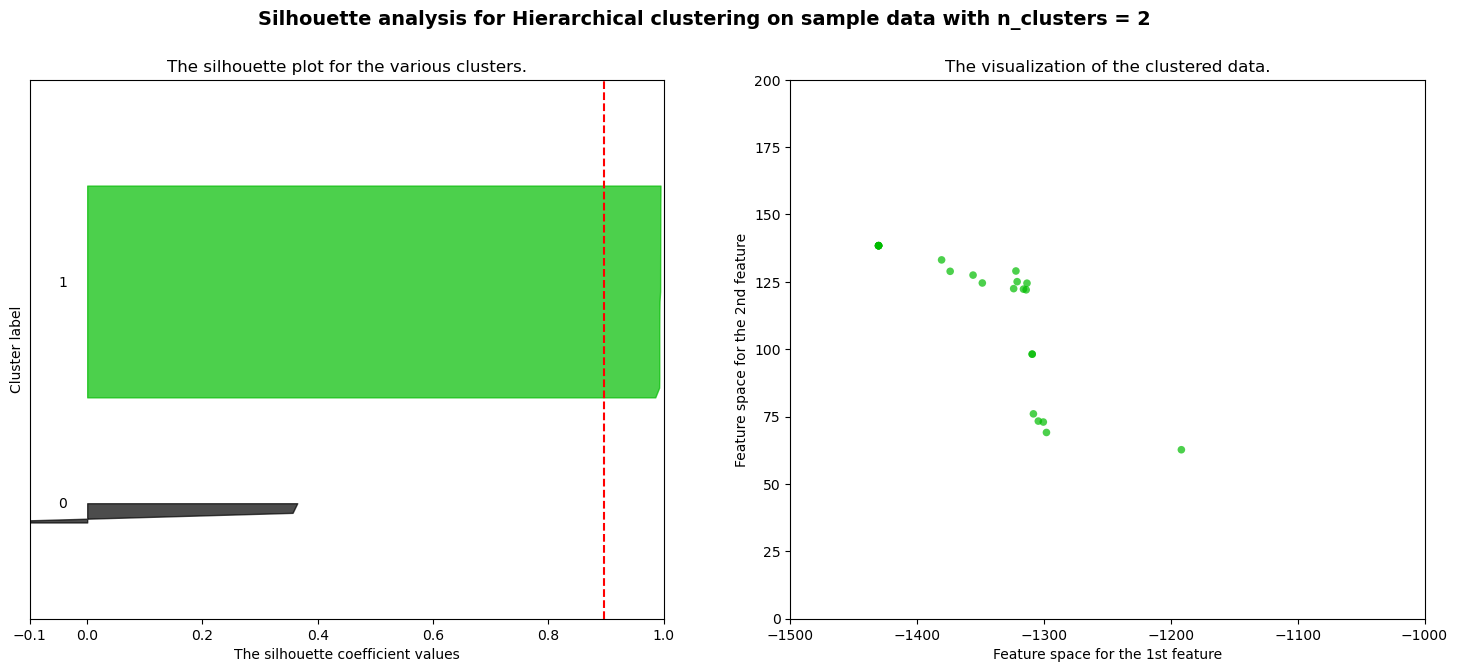

[0 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For n_clusters = 3 The average silhouette_score is : 0.8849788296906228


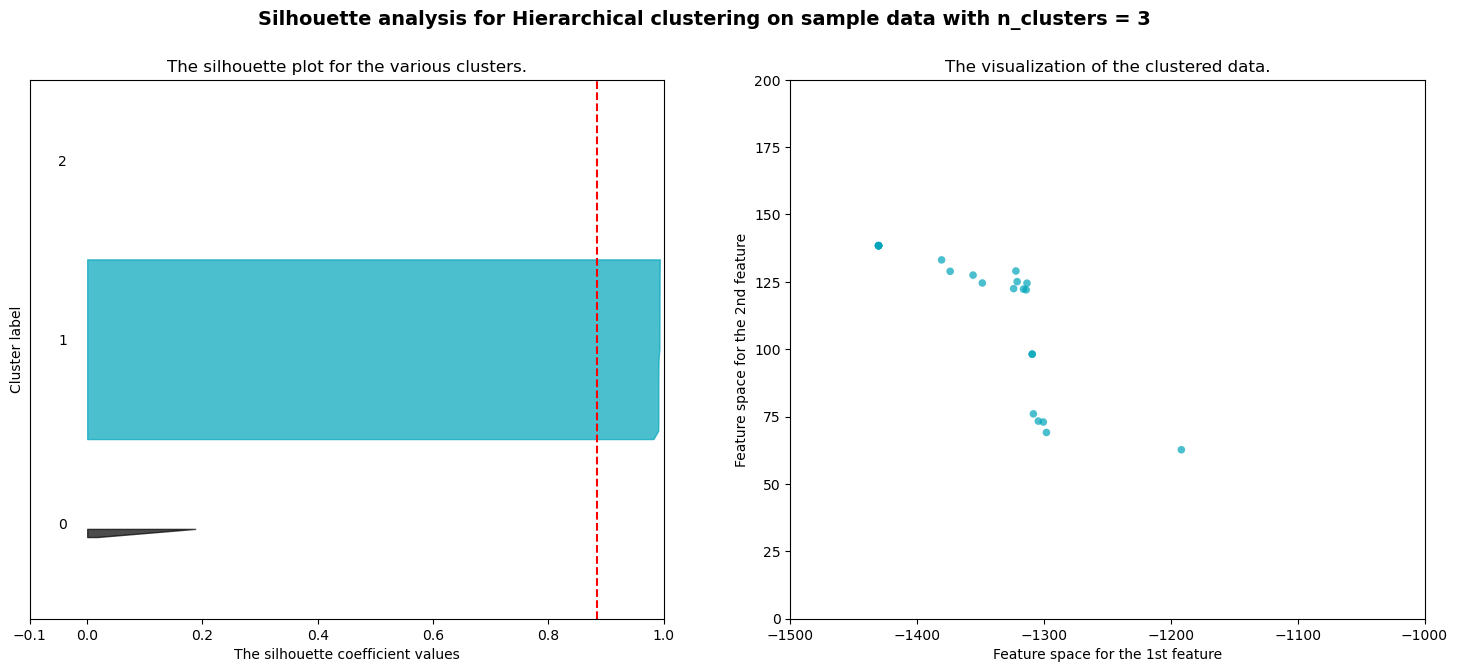

[3 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
For n_clusters = 4 The average silhouette_score is : 0.8744668282121155


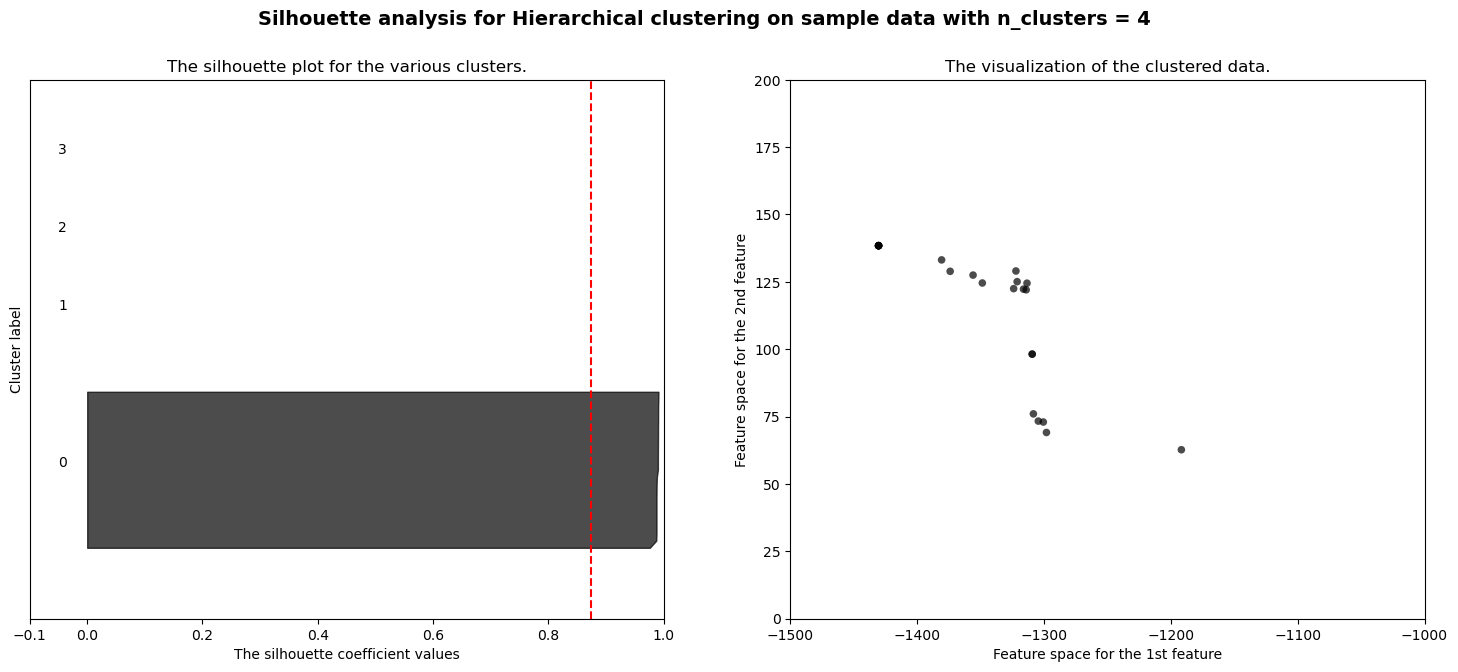

[3 2 0 0 4 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0]
For n_clusters = 5 The average silhouette_score is : 0.4850724617377961


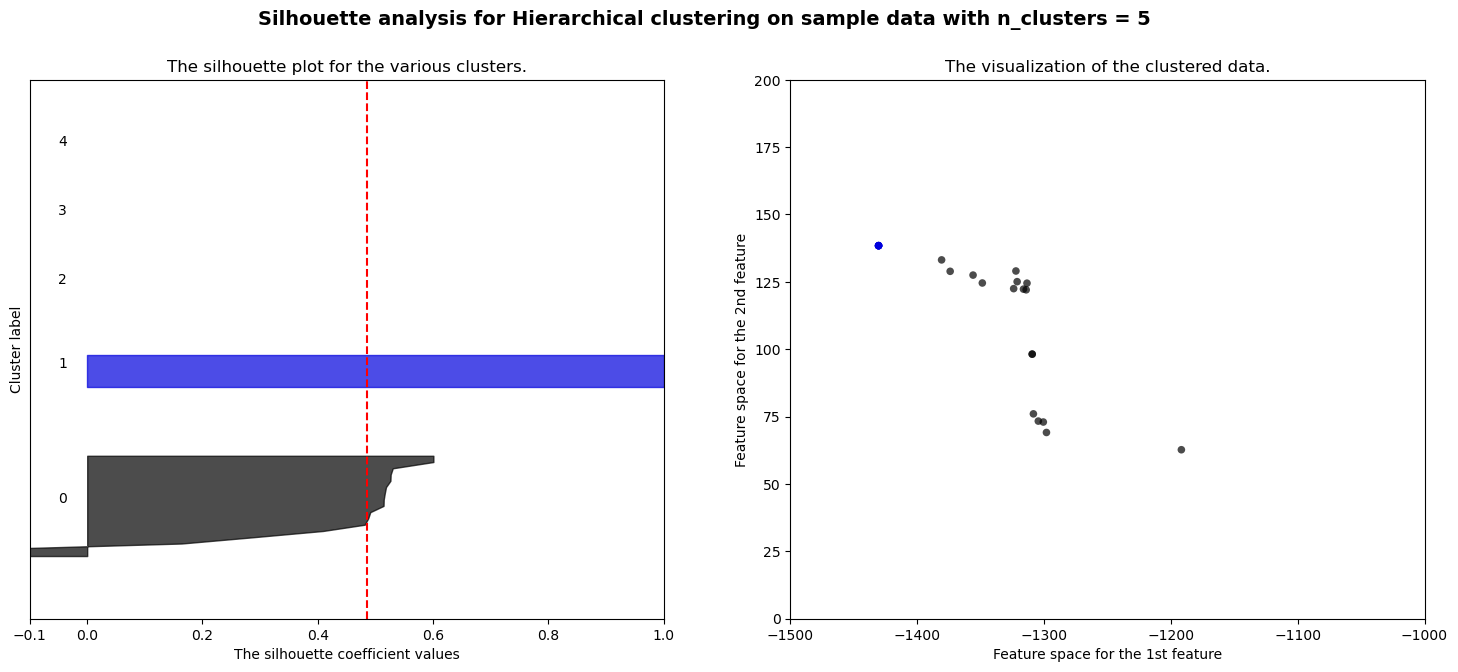

[3 5 0 0 4 1 2 2 2 1 0 0 2 2 1 2 0 2 2 2 1 2 1 1 0 0]
For n_clusters = 6 The average silhouette_score is : 0.4573496802013785


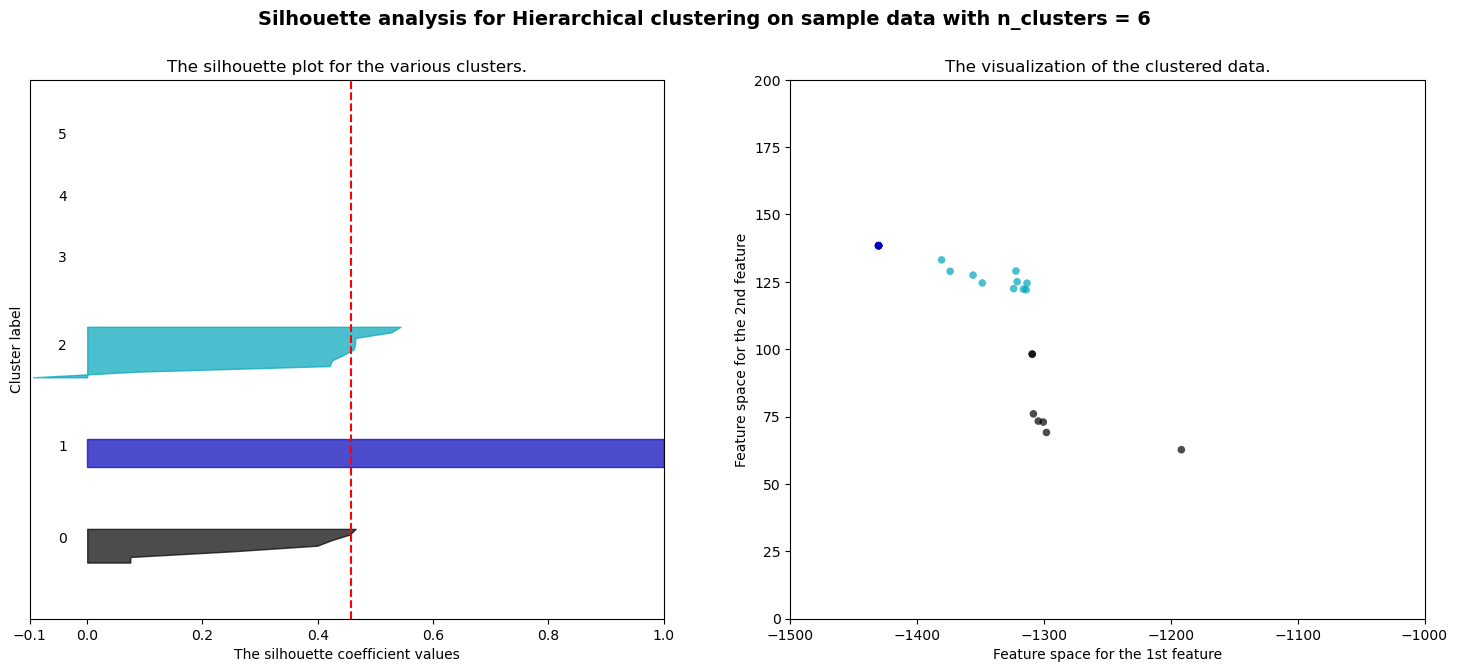

[3 5 2 2 4 1 0 0 0 1 6 2 0 0 1 0 2 0 0 0 1 0 1 1 2 2]
For n_clusters = 7 The average silhouette_score is : 0.4727503648877804


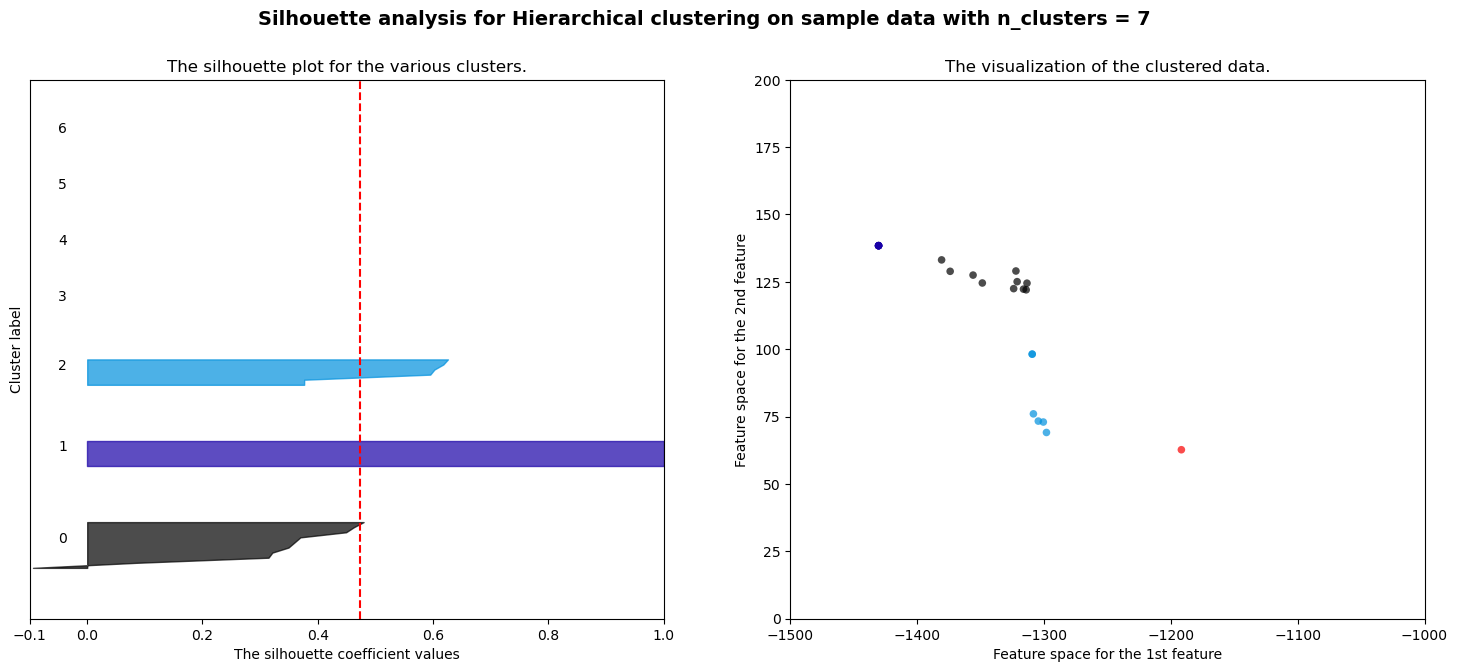

[7 5 2 2 4 3 1 1 1 3 6 2 0 0 3 1 2 0 0 1 3 1 3 3 2 2]
For n_clusters = 8 The average silhouette_score is : 0.4840371658572241


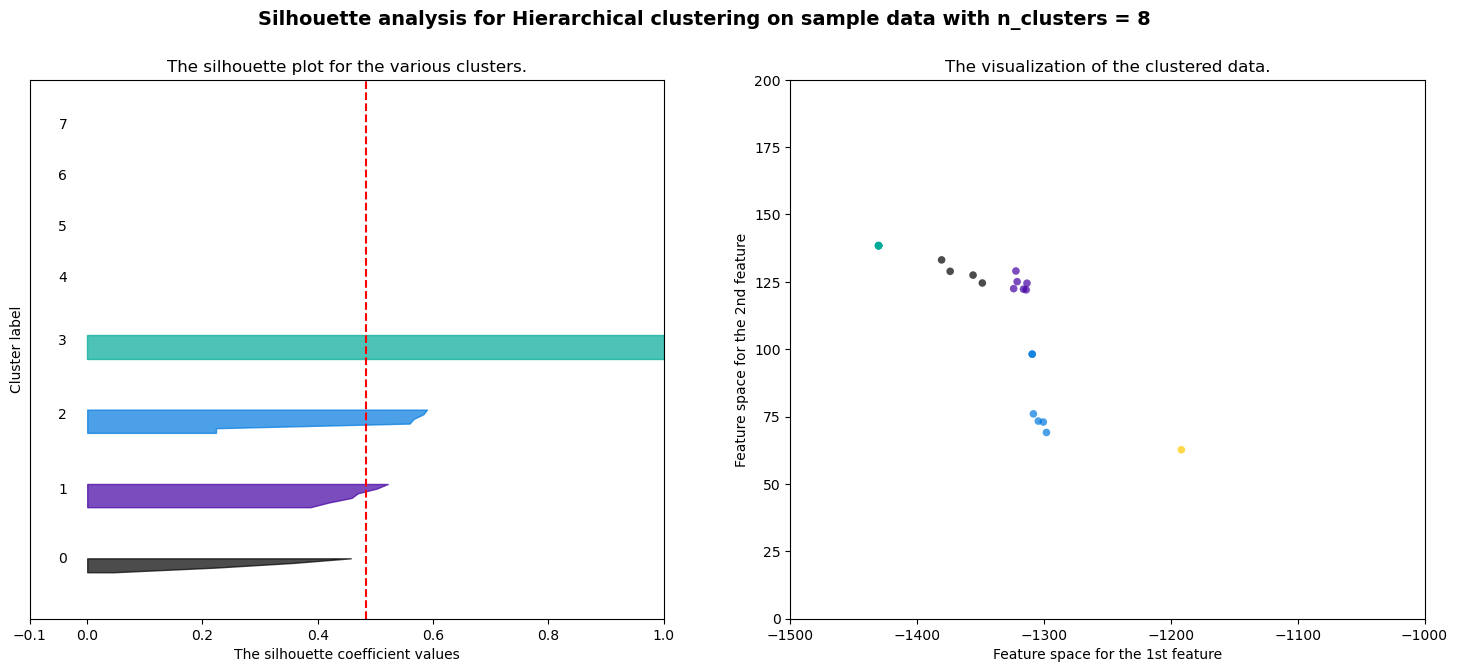

In [9]:
for n_clusters in cluster_amts:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =  AgglomerativeClustering(n_clusters=n_clusters)
    #clusterer = DBSCAN(eps = 10, min_samples = 5)
    
    cluster_labels = clusterer.fit_predict(X_minmax)
    print(cluster_labels)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_minmax, cluster_labels)

    y_lower = 10
    
    if (silhouette_avg>0.25):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_minmax) + (n_clusters + 1) * 10])
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        # Reduce to 2 dimensions using PCA
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X_minmax)

        ax2.scatter(
            X_2d[:, 0], X_2d[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.set_ylim(0,200)
        ax2.set_xlim(-1500,-1000)


        # Labeling the clusters
        """centers = clusterer.cluster_centers_

        centers_2d = pca.transform(centers)

        # Draw white circles at cluster centers
        ax2.scatter(
            centers_2d[:, 0],
            centers_2d[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_2d):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")"""

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for Hierarchical clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8852620803244733


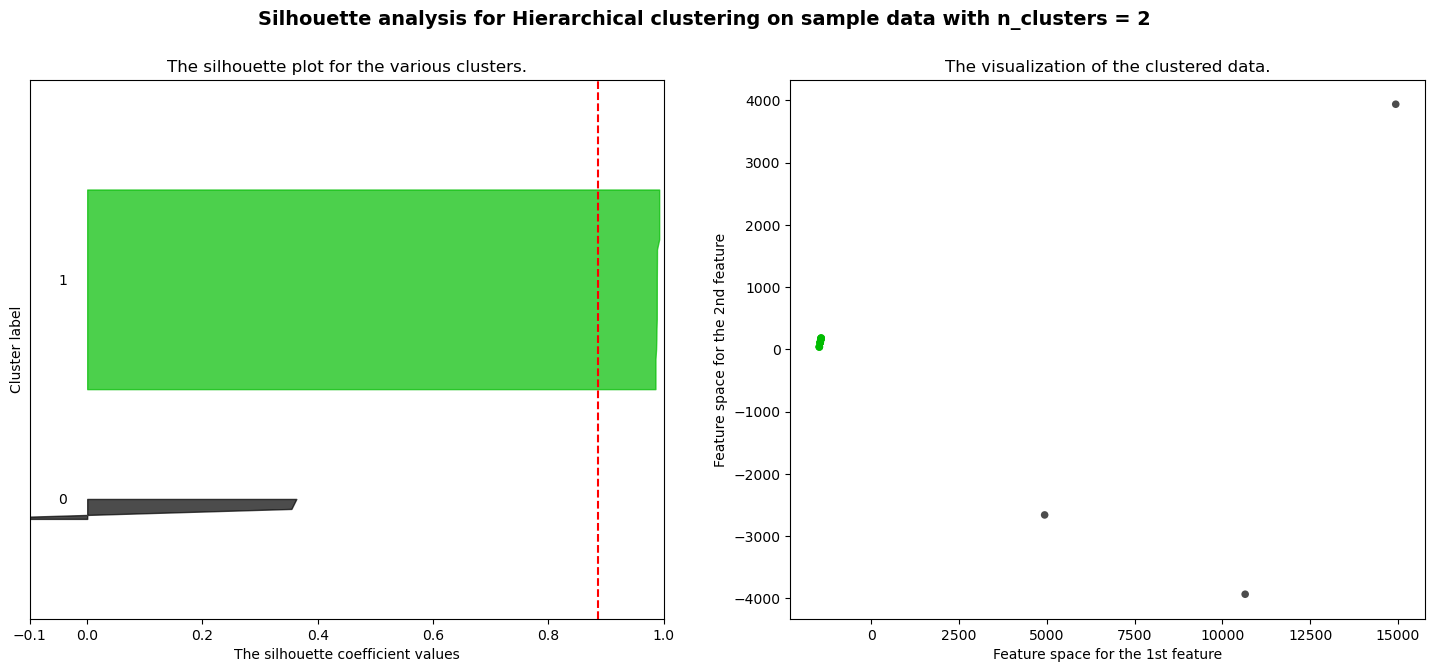

For n_clusters = 3 The average silhouette_score is : 0.8713600508510085


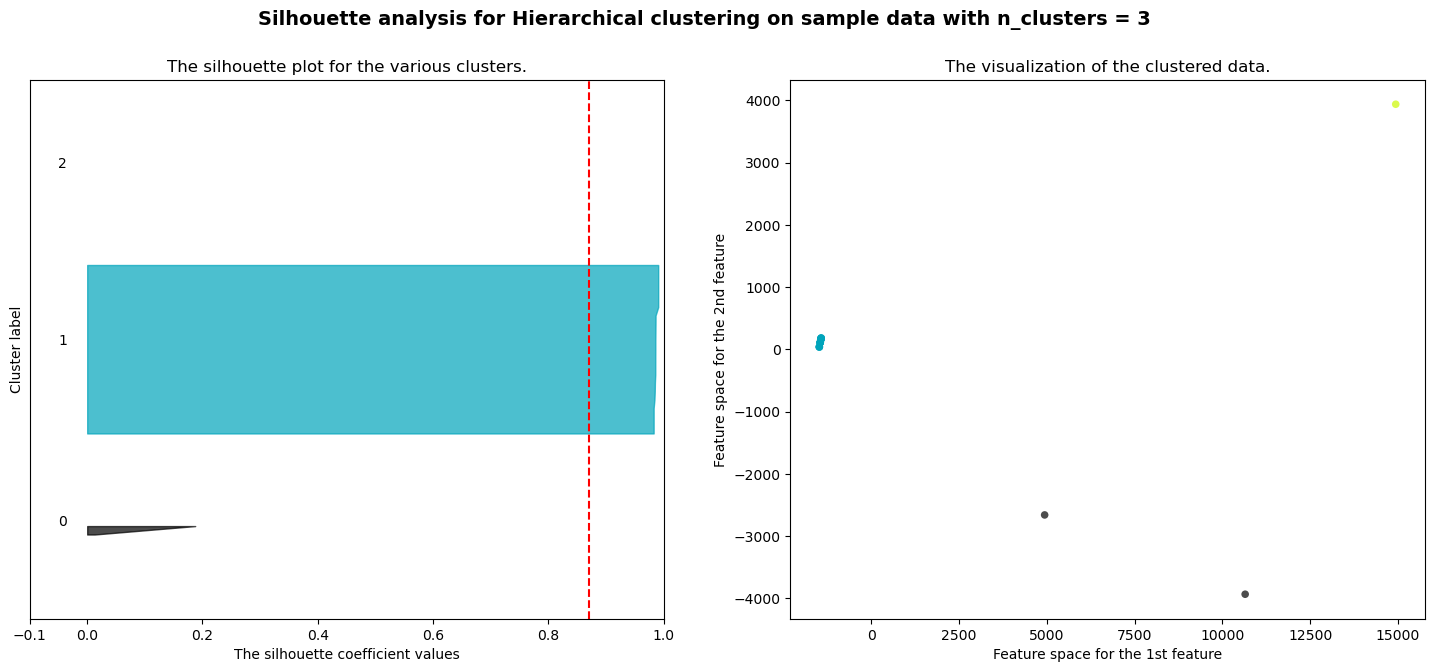

For n_clusters = 4 The average silhouette_score is : 0.8587973996879374


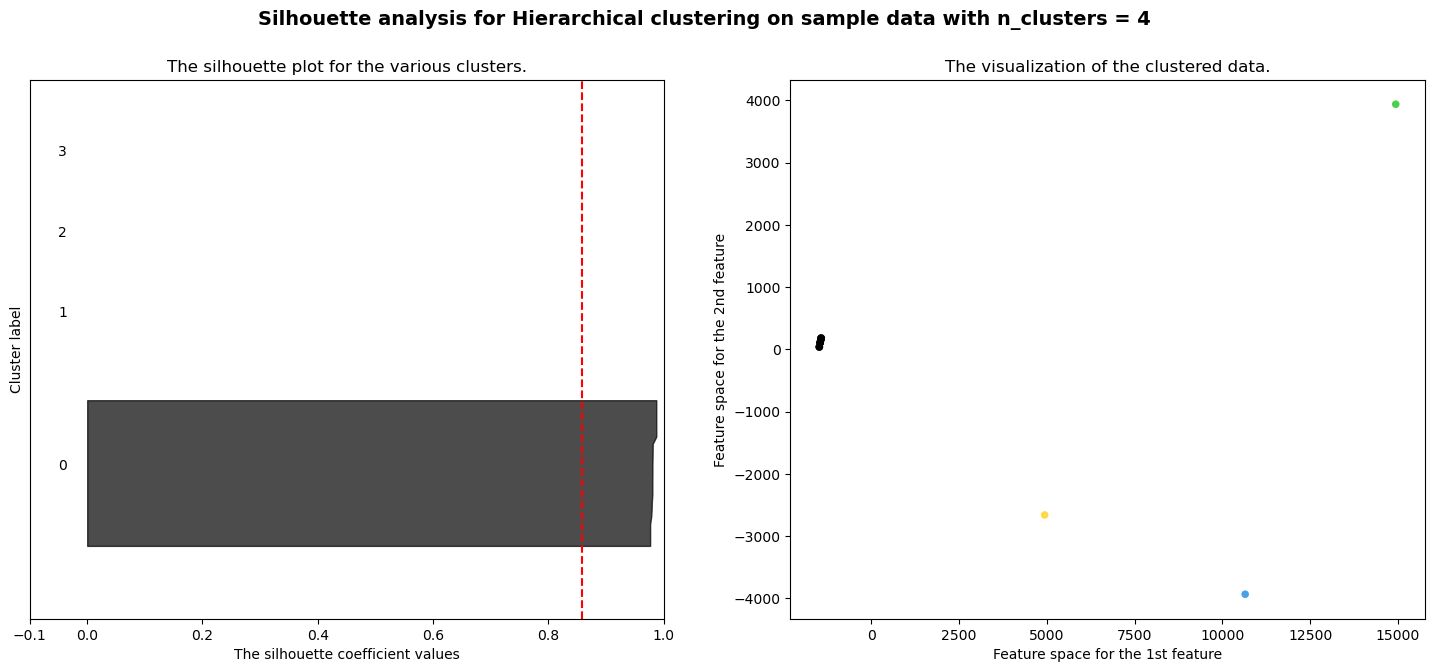

For n_clusters = 5 The average silhouette_score is : 0.32880361232200533


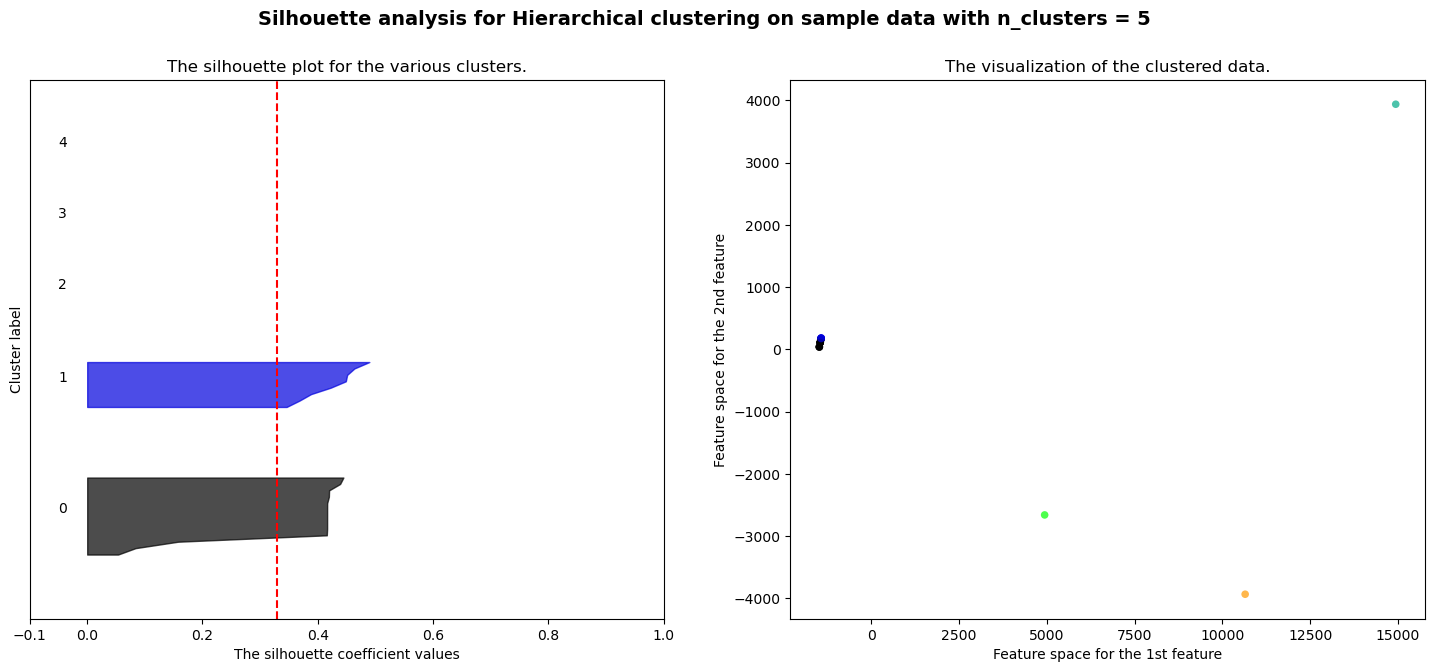

For n_clusters = 6 The average silhouette_score is : 0.3512635860325272


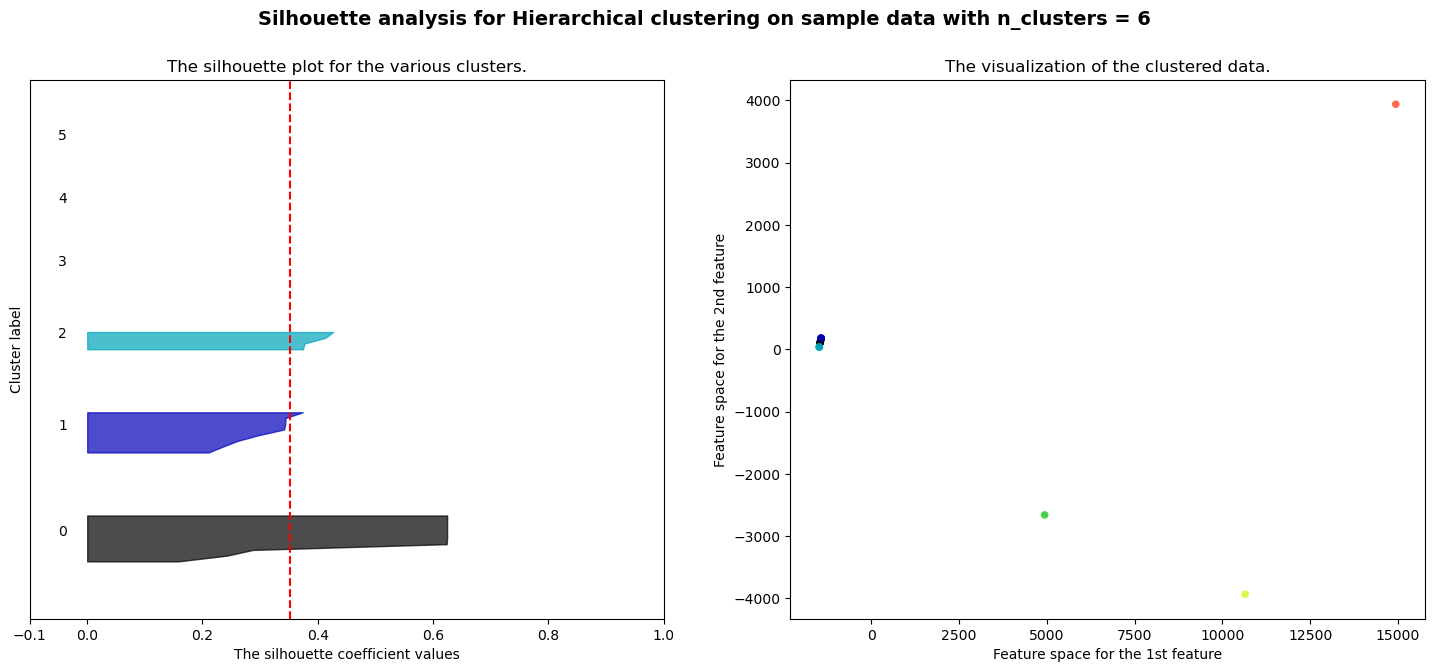

For n_clusters = 7 The average silhouette_score is : 0.4229356718253694


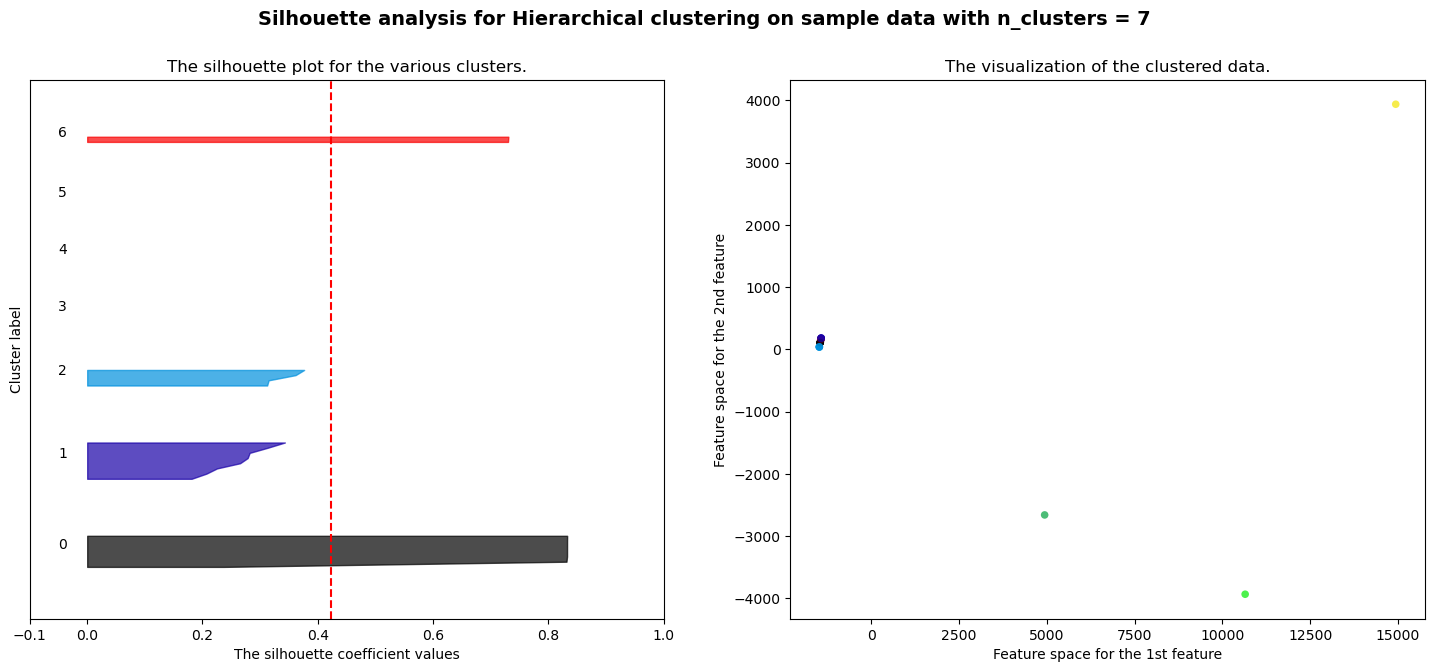

For n_clusters = 8 The average silhouette_score is : 0.4343882173259915


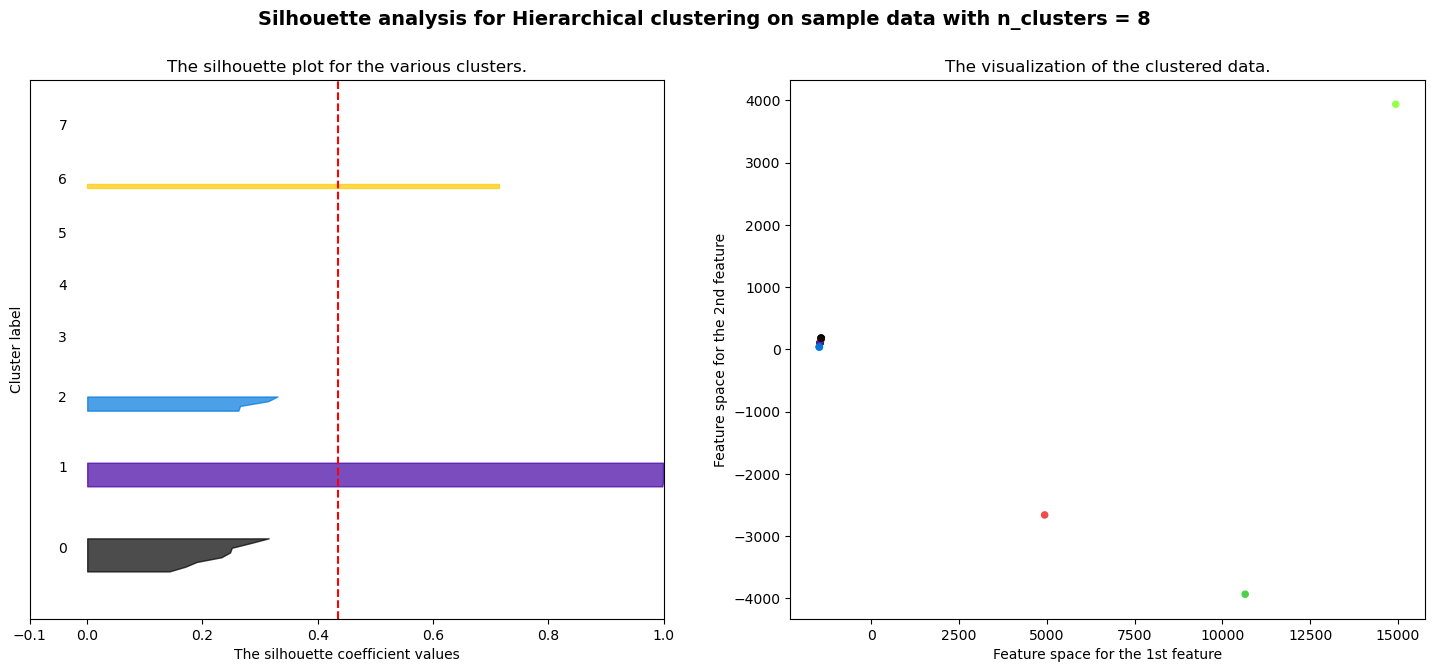

In [9]:
for n_clusters in cluster_amts:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =     AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_standard)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_standard, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_standard, cluster_labels)

    y_lower = 10
    
    if (silhouette_avg>0.25):
            # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_standard) + (n_clusters + 1) * 10])

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        # Reduce to 2 dimensions using PCA
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X_standard)

        ax2.scatter(
            X_2d[:, 0], X_2d[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        """centers = clusterer.cluster_centers_

        centers_2d = pca.transform(centers)

        # Draw white circles at cluster centers
        ax2.scatter(
            centers_2d[:, 0],
            centers_2d[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_2d):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")"""

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for Hierarchical clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()